# Telecom Churn Case Study
# Business problem overview
 
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
telecomchurn=pd.read_csv('telecom_churn_data.csv')

In [3]:
telecomchurn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

# Data Preparation and Cleaning

In [4]:
telecomchurn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
telecomchurn['night_pck_user_6']=telecomchurn['night_pck_user_6'].astype('category')
telecomchurn['night_pck_user_7']=telecomchurn['night_pck_user_7'].astype('category')
telecomchurn['night_pck_user_8']=telecomchurn['night_pck_user_8'].astype('category')
telecomchurn['night_pck_user_9']=telecomchurn['night_pck_user_9'].astype('category')

In [6]:
telecomchurn['fb_user_6']=telecomchurn['fb_user_6'].astype('category')
telecomchurn['fb_user_7']=telecomchurn['fb_user_7'].astype('category')
telecomchurn['fb_user_8']=telecomchurn['fb_user_8'].astype('category')
telecomchurn['fb_user_9']=telecomchurn['fb_user_9'].astype('category')

In [7]:
telecomchurn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [8]:
percentmissing=telecomchurn.isnull().sum()*100/len(telecomchurn)

In [9]:
missingvaluedf=pd.DataFrame({'Column_Name':telecomchurn.columns,'Percent_missing':percentmissing})

In [10]:
pd.set_option('display.max_rows',None)
missingvaluedf

Column_Name  Percent_missing
mobile_number                        mobile_number         0.000000
circle_id                                circle_id         0.000000
loc_og_t2o_mou                      loc_og_t2o_mou         1.018010
std_og_t2o_mou                      std_og_t2o_mou         1.018010
loc_ic_t2o_mou                      loc_ic_t2o_mou         1.018010
last_date_of_month_6          last_date_of_month_6         0.000000
last_date_of_month_7          last_date_of_month_7         0.601006
last_date_of_month_8          last_date_of_month_8         1.100011
last_date_of_month_9          last_date_of_month_9         1.659017
arpu_6                                      arpu_6         0.000000
arpu_7                                      arpu_7         0.000000
arpu_8                                      arpu_8         0.000000
arpu_9                                      arpu_9         0.000000
onnet_mou_6                            onnet_mou_6         3.937039
onnet_mou_7                            onnet_mou_7         3.859039
onnet_mou_8                            onnet_mou_8         5.378054
onnet_mou_9                            onnet_mou_9         7.745077
offnet_mou_6                          offnet_mou_6         3.937039
offnet_mou_7                          offnet_mou_7         3.859039
offnet_mou_8                          offnet_mou_8         5.378054
offnet_mou_9                          offnet_mou_9         7.745077
roam_ic_mou_6                        roam_ic_mou_6         3.937039
roam_ic_mou_7                        roam_ic_mou_7         3.859039
roam_ic_mou_8                        roam_ic_mou_8         5.378054
roam_ic_mou_9                        roam_ic_mou_9         7.745077
roam_og_mou_6                        roam_og_mou_6         3.937039
roam_og_mou_7                        roam_og_mou_7         3.859039
roam_og_mou_8                        roam_og_mou_8         5.378054
roam_og_mou_9                        roam_og_mou_9         7.745077
loc_og_t2t_mou_6                  loc_og_t2t_mou_6         3.937039
loc_og_t2t_mou_7                  loc_og_t2t_mou_7         3.859039
loc_og_t2t_mou_8                  loc_og_t2t_mou_8         5.378054
loc_og_t2t_mou_9                  loc_og_t2t_mou_9         7.745077
loc_og_t2m_mou_6                  loc_og_t2m_mou_6         3.937039
loc_og_t2m_mou_7                  loc_og_t2m_mou_7         3.859039
loc_og_t2m_mou_8                  loc_og_t2m_mou_8         5.378054
loc_og_t2m_mou_9                  loc_og_t2m_mou_9         7.745077
loc_og_t2f_mou_6                  loc_og_t2f_mou_6         3.937039
loc_og_t2f_mou_7                  loc_og_t2f_mou_7         3.859039
loc_og_t2f_mou_8                  loc_og_t2f_mou_8         5.378054
loc_og_t2f_mou_9                  loc_og_t2f_mou_9         7.745077
loc_og_t2c_mou_6                  loc_og_t2c_mou_6         3.937039
loc_og_t2c_mou_7                  loc_og_t2c_mou_7         3.859039
loc_og_t2c_mou_8                  loc_og_t2c_mou_8         5.378054
loc_og_t2c_mou_9                  loc_og_t2c_mou_9         7.745077
loc_og_mou_6                          loc_og_mou_6         3.937039
loc_og_mou_7                          loc_og_mou_7         3.859039
loc_og_mou_8                          loc_og_mou_8         5.378054
loc_og_mou_9                          loc_og_mou_9         7.745077
std_og_t2t_mou_6                  std_og_t2t_mou_6         3.937039
std_og_t2t_mou_7                  std_og_t2t_mou_7         3.859039
std_og_t2t_mou_8                  std_og_t2t_mou_8         5.378054
std_og_t2t_mou_9                  std_og_t2t_mou_9         7.745077
std_og_t2m_mou_6                  std_og_t2m_mou_6         3.937039
std_og_t2m_mou_7                  std_og_t2m_mou_7         3.859039
std_og_t2m_mou_8                  std_og_t2m_mou_8         5.378054
std_og_t2m_mou_9                  std_og_t2m_mou_9         7.745077
std_og_t2f_mou_6                  std_og_t2f_mou_6         3.937039
std_og_t2f_mou_7           

# Fixing Missing values 

Looking at certain variables if missing values are meaningful
Checking columns with missing values greater than 40%
Identifying meaningful missing values
Look at all columns with missing values
In case of missing values for data of last recharge, total recharge amt will not be applicable and there will be also not be max recharge amt and the count of recharge for 2g and 3g. No 2g and 3g implies no average revenue for the user for the month. In case of Night Packs whenever data is not available data is also not available for 2g and 3g also, no data implies no access to facebook hence these are meaningful missing values hat can be imputed as 0.

In [11]:
month6telecom=telecomchurn[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6']]

In [12]:
month7telecom=telecomchurn[['date_of_last_rech_data_7','total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7']]

In [13]:
month8telecom=telecomchurn[['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8']]

In [14]:
month9telecom=telecomchurn[['date_of_last_rech_data_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','arpu_3g_9','arpu_2g_9','night_pck_user_9','fb_user_9']]

In [15]:
month6telecom[month6telecom.isna()].head(20)

date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6  \
0                       NaN                NaN              NaN   
1                       NaN                NaN              NaN   
2                       NaN                NaN              NaN   
3                       NaN                NaN              NaN   
4                       NaN                NaN              NaN   
5                       NaN                NaN              NaN   
6                       NaN                NaN              NaN   
7                       NaN                NaN              NaN   
8                       NaN                NaN              NaN   
9                       NaN                NaN              NaN   
10                      NaN                NaN              NaN   
11                      NaN                NaN              NaN   
12                      NaN                NaN              NaN   
13                      NaN                NaN              NaN   
14                      NaN                NaN              NaN   
15                      NaN                NaN              NaN   
16                      NaN                NaN              NaN   
17                      NaN                NaN              NaN   
18                      NaN                NaN              NaN   
19                      NaN                NaN              NaN   

    count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  arpu_3g_6  \
0               NaN              NaN                 NaN        NaN   
1               NaN              NaN                 NaN        NaN   
2               NaN              NaN                 NaN        NaN   
3               NaN              NaN                 NaN        NaN   
4               NaN              NaN                 NaN        NaN   
5               NaN              NaN                 NaN        NaN   
6               NaN              NaN                 NaN        NaN   
7               NaN              NaN                 NaN        NaN   
8               NaN              NaN                 NaN        NaN   
9               NaN              NaN                 NaN        NaN   
10              NaN              NaN                 NaN        NaN   
11              NaN              NaN                 NaN        NaN   
12              NaN              NaN                 NaN        NaN   
13              NaN              NaN                 NaN        NaN   
14              NaN              NaN                 NaN        NaN   
15              NaN              NaN                 NaN        NaN   
16              NaN              NaN                 NaN        NaN   
17              NaN              NaN                 NaN        NaN   
18              NaN              NaN                 NaN        NaN   
19              NaN              NaN                 NaN        NaN   

    arpu_2g_6 night_pck_user_6 fb_user_6  
0         NaN              NaN       NaN  
1         NaN              NaN       NaN  
2         NaN              NaN       NaN  
3         NaN              NaN       NaN  
4         NaN              NaN       NaN  
5         NaN              NaN       NaN  
6         NaN              NaN       NaN  
7         NaN              NaN       NaN  
8         NaN              NaN       NaN  
9         NaN              NaN       NaN  
10        NaN              NaN       NaN  
11        NaN              NaN       NaN  
12        NaN              NaN       NaN  
13        NaN              NaN       NaN  
14        NaN              NaN       NaN  
15        NaN              NaN       NaN  
16        NaN              NaN       NaN  
17        NaN              NaN       NaN  
18        NaN              NaN       NaN  
19        NaN              NaN       NaN

In [16]:
month7telecom[month7telecom.isna()].head(20)

date_of_last_rech_data_7  total_rech_data_7  max_rech_data_7  \
0                       NaN                NaN              NaN   
1                       NaN                NaN              NaN   
2                       NaN                NaN              NaN   
3                       NaN                NaN              NaN   
4                       NaN                NaN              NaN   
5                       NaN                NaN              NaN   
6                       NaN                NaN              NaN   
7                       NaN                NaN              NaN   
8                       NaN                NaN              NaN   
9                       NaN                NaN              NaN   
10                      NaN                NaN              NaN   
11                      NaN                NaN              NaN   
12                      NaN                NaN              NaN   
13                      NaN                NaN              NaN   
14                      NaN                NaN              NaN   
15                      NaN                NaN              NaN   
16                      NaN                NaN              NaN   
17                      NaN                NaN              NaN   
18                      NaN                NaN              NaN   
19                      NaN                NaN              NaN   

    count_rech_2g_7  count_rech_3g_7  av_rech_amt_data_7  arpu_3g_7  \
0               NaN              NaN                 NaN        NaN   
1               NaN              NaN                 NaN        NaN   
2               NaN              NaN                 NaN        NaN   
3               NaN              NaN                 NaN        NaN   
4               NaN              NaN                 NaN        NaN   
5               NaN              NaN                 NaN        NaN   
6               NaN              NaN                 NaN        NaN   
7               NaN              NaN                 NaN        NaN   
8               NaN              NaN                 NaN        NaN   
9               NaN              NaN                 NaN        NaN   
10              NaN              NaN                 NaN        NaN   
11              NaN              NaN                 NaN        NaN   
12              NaN              NaN                 NaN        NaN   
13              NaN              NaN                 NaN        NaN   
14              NaN              NaN                 NaN        NaN   
15              NaN              NaN                 NaN        NaN   
16              NaN              NaN                 NaN        NaN   
17              NaN              NaN                 NaN        NaN   
18              NaN              NaN                 NaN        NaN   
19              NaN              NaN                 NaN        NaN   

    arpu_2g_7 night_pck_user_7 fb_user_7  
0         NaN              NaN       NaN  
1         NaN              NaN       NaN  
2         NaN              NaN       NaN  
3         NaN              NaN       NaN  
4         NaN              NaN       NaN  
5         NaN              NaN       NaN  
6         NaN              NaN       NaN  
7         NaN              NaN       NaN  
8         NaN              NaN       NaN  
9         NaN              NaN       NaN  
10        NaN              NaN       NaN  
11        NaN              NaN       NaN  
12        NaN              NaN       NaN  
13        NaN              NaN       NaN  
14        NaN              NaN       NaN  
15        NaN              NaN       NaN  
16        NaN              NaN       NaN  
17        NaN              NaN       NaN  
18        NaN              NaN       NaN  
19        NaN              NaN       NaN

In [17]:
month8telecom[month8telecom.isna()].head(20)

date_of_last_rech_data_8  total_rech_data_8  max_rech_data_8  \
0                       NaN                NaN              NaN   
1                       NaN                NaN              NaN   
2                       NaN                NaN              NaN   
3                       NaN                NaN              NaN   
4                       NaN                NaN              NaN   
5                       NaN                NaN              NaN   
6                       NaN                NaN              NaN   
7                       NaN                NaN              NaN   
8                       NaN                NaN              NaN   
9                       NaN                NaN              NaN   
10                      NaN                NaN              NaN   
11                      NaN                NaN              NaN   
12                      NaN                NaN              NaN   
13                      NaN                NaN              NaN   
14                      NaN                NaN              NaN   
15                      NaN                NaN              NaN   
16                      NaN                NaN              NaN   
17                      NaN                NaN              NaN   
18                      NaN                NaN              NaN   
19                      NaN                NaN              NaN   

    count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  arpu_3g_8  \
0               NaN              NaN                 NaN        NaN   
1               NaN              NaN                 NaN        NaN   
2               NaN              NaN                 NaN        NaN   
3               NaN              NaN                 NaN        NaN   
4               NaN              NaN                 NaN        NaN   
5               NaN              NaN                 NaN        NaN   
6               NaN              NaN                 NaN        NaN   
7               NaN              NaN                 NaN        NaN   
8               NaN              NaN                 NaN        NaN   
9               NaN              NaN                 NaN        NaN   
10              NaN              NaN                 NaN        NaN   
11              NaN              NaN                 NaN        NaN   
12              NaN              NaN                 NaN        NaN   
13              NaN              NaN                 NaN        NaN   
14              NaN              NaN                 NaN        NaN   
15              NaN              NaN                 NaN        NaN   
16              NaN              NaN                 NaN        NaN   
17              NaN              NaN                 NaN        NaN   
18              NaN              NaN                 NaN        NaN   
19              NaN              NaN                 NaN        NaN   

    arpu_2g_8 night_pck_user_8 fb_user_8  
0         NaN              NaN       NaN  
1         NaN              NaN       NaN  
2         NaN              NaN       NaN  
3         NaN              NaN       NaN  
4         NaN              NaN       NaN  
5         NaN              NaN       NaN  
6         NaN              NaN       NaN  
7         NaN              NaN       NaN  
8         NaN              NaN       NaN  
9         NaN              NaN       NaN  
10        NaN              NaN       NaN  
11        NaN              NaN       NaN  
12        NaN              NaN       NaN  
13        NaN              NaN       NaN  
14        NaN              NaN       NaN  
15        NaN              NaN       NaN  
16        NaN              NaN       NaN  
17        NaN              NaN       NaN  
18        NaN              NaN       NaN  
19        NaN              NaN       NaN

In [18]:
month9telecom[month9telecom.isna()].head(20)

date_of_last_rech_data_9  total_rech_data_9  max_rech_data_9  \
0                       NaN                NaN              NaN   
1                       NaN                NaN              NaN   
2                       NaN                NaN              NaN   
3                       NaN                NaN              NaN   
4                       NaN                NaN              NaN   
5                       NaN                NaN              NaN   
6                       NaN                NaN              NaN   
7                       NaN                NaN              NaN   
8                       NaN                NaN              NaN   
9                       NaN                NaN              NaN   
10                      NaN                NaN              NaN   
11                      NaN                NaN              NaN   
12                      NaN                NaN              NaN   
13                      NaN                NaN              NaN   
14                      NaN                NaN              NaN   
15                      NaN                NaN              NaN   
16                      NaN                NaN              NaN   
17                      NaN                NaN              NaN   
18                      NaN                NaN              NaN   
19                      NaN                NaN              NaN   

    count_rech_2g_9  count_rech_3g_9  av_rech_amt_data_9  arpu_3g_9  \
0               NaN              NaN                 NaN        NaN   
1               NaN              NaN                 NaN        NaN   
2               NaN              NaN                 NaN        NaN   
3               NaN              NaN                 NaN        NaN   
4               NaN              NaN                 NaN        NaN   
5               NaN              NaN                 NaN        NaN   
6               NaN              NaN                 NaN        NaN   
7               NaN              NaN                 NaN        NaN   
8               NaN              NaN                 NaN        NaN   
9               NaN              NaN                 NaN        NaN   
10              NaN              NaN                 NaN        NaN   
11              NaN              NaN                 NaN        NaN   
12              NaN              NaN                 NaN        NaN   
13              NaN              NaN                 NaN        NaN   
14              NaN              NaN                 NaN        NaN   
15              NaN              NaN                 NaN        NaN   
16              NaN              NaN                 NaN        NaN   
17              NaN              NaN                 NaN        NaN   
18              NaN              NaN                 NaN        NaN   
19              NaN              NaN                 NaN        NaN   

    arpu_2g_9 night_pck_user_9 fb_user_9  
0         NaN              NaN       NaN  
1         NaN              NaN       NaN  
2         NaN              NaN       NaN  
3         NaN              NaN       NaN  
4         NaN              NaN       NaN  
5         NaN              NaN       NaN  
6         NaN              NaN       NaN  
7         NaN              NaN       NaN  
8         NaN              NaN       NaN  
9         NaN              NaN       NaN  
10        NaN              NaN       NaN  
11        NaN              NaN       NaN  
12        NaN              NaN       NaN  
13        NaN              NaN       NaN  
14        NaN              NaN       NaN  
15        NaN              NaN       NaN  
16        NaN              NaN       NaN  
17        NaN              NaN       NaN  
18        NaN              NaN       NaN  
19        NaN              NaN       NaN

In [19]:
Usefulcolswithhighmissingvalues=['total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6','total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7','total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8','total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','arpu_3g_9','arpu_2g_9','night_pck_user_9','fb_user_9']

In [20]:
telecomchurn[Usefulcolswithhighmissingvalues]=telecomchurn[Usefulcolswithhighmissingvalues].apply(lambda x:x.fillna(0))

In [21]:
percentmissing1=telecomchurn.isnull().sum()*100/len(telecomchurn)

In [22]:
missingvaluedf1=pd.DataFrame({'Column_Name':telecomchurn.columns,'Percent_missing':percentmissing1})

In [23]:
pd.set_option('display.max_rows',None)
missingvaluedf1

Column_Name  Percent_missing
mobile_number                        mobile_number         0.000000
circle_id                                circle_id         0.000000
loc_og_t2o_mou                      loc_og_t2o_mou         1.018010
std_og_t2o_mou                      std_og_t2o_mou         1.018010
loc_ic_t2o_mou                      loc_ic_t2o_mou         1.018010
last_date_of_month_6          last_date_of_month_6         0.000000
last_date_of_month_7          last_date_of_month_7         0.601006
last_date_of_month_8          last_date_of_month_8         1.100011
last_date_of_month_9          last_date_of_month_9         1.659017
arpu_6                                      arpu_6         0.000000
arpu_7                                      arpu_7         0.000000
arpu_8                                      arpu_8         0.000000
arpu_9                                      arpu_9         0.000000
onnet_mou_6                            onnet_mou_6         3.937039
onnet_mou_7                            onnet_mou_7         3.859039
onnet_mou_8                            onnet_mou_8         5.378054
onnet_mou_9                            onnet_mou_9         7.745077
offnet_mou_6                          offnet_mou_6         3.937039
offnet_mou_7                          offnet_mou_7         3.859039
offnet_mou_8                          offnet_mou_8         5.378054
offnet_mou_9                          offnet_mou_9         7.745077
roam_ic_mou_6                        roam_ic_mou_6         3.937039
roam_ic_mou_7                        roam_ic_mou_7         3.859039
roam_ic_mou_8                        roam_ic_mou_8         5.378054
roam_ic_mou_9                        roam_ic_mou_9         7.745077
roam_og_mou_6                        roam_og_mou_6         3.937039
roam_og_mou_7                        roam_og_mou_7         3.859039
roam_og_mou_8                        roam_og_mou_8         5.378054
roam_og_mou_9                        roam_og_mou_9         7.745077
loc_og_t2t_mou_6                  loc_og_t2t_mou_6         3.937039
loc_og_t2t_mou_7                  loc_og_t2t_mou_7         3.859039
loc_og_t2t_mou_8                  loc_og_t2t_mou_8         5.378054
loc_og_t2t_mou_9                  loc_og_t2t_mou_9         7.745077
loc_og_t2m_mou_6                  loc_og_t2m_mou_6         3.937039
loc_og_t2m_mou_7                  loc_og_t2m_mou_7         3.859039
loc_og_t2m_mou_8                  loc_og_t2m_mou_8         5.378054
loc_og_t2m_mou_9                  loc_og_t2m_mou_9         7.745077
loc_og_t2f_mou_6                  loc_og_t2f_mou_6         3.937039
loc_og_t2f_mou_7                  loc_og_t2f_mou_7         3.859039
loc_og_t2f_mou_8                  loc_og_t2f_mou_8         5.378054
loc_og_t2f_mou_9                  loc_og_t2f_mou_9         7.745077
loc_og_t2c_mou_6                  loc_og_t2c_mou_6         3.937039
loc_og_t2c_mou_7                  loc_og_t2c_mou_7         3.859039
loc_og_t2c_mou_8                  loc_og_t2c_mou_8         5.378054
loc_og_t2c_mou_9                  loc_og_t2c_mou_9         7.745077
loc_og_mou_6                          loc_og_mou_6         3.937039
loc_og_mou_7                          loc_og_mou_7         3.859039
loc_og_mou_8                          loc_og_mou_8         5.378054
loc_og_mou_9                          loc_og_mou_9         7.745077
std_og_t2t_mou_6                  std_og_t2t_mou_6         3.937039
std_og_t2t_mou_7                  std_og_t2t_mou_7         3.859039
std_og_t2t_mou_8                  std_og_t2t_mou_8         5.378054
std_og_t2t_mou_9                  std_og_t2t_mou_9         7.745077
std_og_t2m_mou_6                  std_og_t2m_mou_6         3.937039
std_og_t2m_mou_7                  std_og_t2m_mou_7         3.859039
std_og_t2m_mou_8                  std_og_t2m_mou_8         5.378054
std_og_t2m_mou_9                  std_og_t2m_mou_9         7.745077
std_og_t2f_mou_6                  std_og_t2f_mou_6         3.937039
std_og_t2f_mou_7           

In [24]:
# Dropping unimportant columns
telecomchurn.drop(['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9','date_of_last_rech_6','date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'],axis=1,inplace=True)

In [25]:
telecomchurn.shape

(99999, 212)

In [26]:
telecomchurn.describe([0.25,0.5,0.75,0.99])

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         98981.0         98981.0         98981.0  99999.000000   
mean              0.0             0.0             0.0    282.987358   
std               0.0             0.0             0.0    328.439770   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0     93.411500   
50%               0.0             0.0             0.0    197.704000   
75%               0.0             0.0             0.0    371.060000   
99%               0.0             0.0             0.0   1410.792540   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000   
mean     278.536648    279.154731    261.645069    132.395875    133.670805   
std      338.156291    344.474791    341.998630    297.207406    308.794148   
min    -2014.045000   -945.808000  -1899.505000      0.000000      0.000000   
25%       86.980500     84.126000     62.685000      7.380000      6.660000   
50%      191.640000    192.080000    176.849000     34.310000     32.330000   
75%      365.344500    369.370500    353.466500    118.740000    115.595000   
99%     1428.685880   1455.539960   1402.445660   1431.760500   1478.533300   
max    35145.834000  33543.624000  38805.617000   7376.710000   8157.780000   

        onnet_mou_8  ...  monthly_3g_9   sachet_3g_6   sachet_3g_7  \
count  94621.000000  ...  99999.000000  99999.000000  99999.000000   
mean     133.018098  ...      0.086341      0.074781      0.080401   
std      308.951589  ...      0.384978      0.568344      0.628334   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.460000  ...      0.000000      0.000000      0.000000   
50%       32.360000  ...      0.000000      0.000000      0.000000   
75%      115.860000  ...      0.000000      0.000000      0.000000   
99%     1480.334000  ...      2.000000      2.000000      2.000000   
max    10752.560000  ...     11.000000     29.000000     35.000000   

        sachet_3g_8   sachet_3g_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean       0.084501      0.084581   1219.854749     68.170248     66.839062   
std        0.660234      0.650457    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        0.000000      0.000000    467.000000      0.000000      0.000000   
50%        0.000000      0.000000    863.000000      0.000000      0.000000   
75%        0.000000      0.000000   1807.500000      0.000000      0.000000   
99%        2.000000      2.000000   3651.000000   1240.063600   1278.158000   
max       41.000000     49.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
99%     1187.785200     86.554000  
max    11166.210000   2618.570000  

[9 rows x 204 columns]

In [27]:
telecomchurn.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 212 columns):
 #    Column              Non-Null Count  Dtype   
---   ------              --------------  -----   
 0    loc_og_t2o_mou      98981 non-null  float64 
 1    std_og_t2o_mou      98981 non-null  float64 
 2    loc_ic_t2o_mou      98981 non-null  float64 
 3    arpu_6              99999 non-null  float64 
 4    arpu_7              99999 non-null  float64 
 5    arpu_8              99999 non-null  float64 
 6    arpu_9              99999 non-null  float64 
 7    onnet_mou_6         96062 non-null  float64 
 8    onnet_mou_7         96140 non-null  float64 
 9    onnet_mou_8         94621 non-null  float64 
 10   onnet_mou_9         92254 non-null  float64 
 11   offnet_mou_6        96062 non-null  float64 
 12   offnet_mou_7        96140 non-null  float64 
 13   offnet_mou_8        94621 non-null  float64 
 14   offnet_mou_9        92254 non-null  float64 
 15   roam_ic_mou_6    

In [28]:
telecomchurn['total_rech_amt_data_6']=telecomchurn['av_rech_amt_data_6']*telecomchurn['total_rech_data_6']
telecomchurn['total_rech_amt_data_7']=telecomchurn['av_rech_amt_data_7']*telecomchurn['total_rech_data_7']

In [29]:
telecomchurn['total_rech_amt_combined_6']=telecomchurn['total_rech_amt_data_6']+telecomchurn['total_rech_amt_6']
telecomchurn['total_rech_amt_combined_7']=telecomchurn['total_rech_amt_data_7']+telecomchurn['total_rech_amt_7']

In [30]:
telecomchurn['total_rech_amt_combined_6 and 7']=telecomchurn['total_rech_amt_combined_6']+telecomchurn['total_rech_amt_combined_7']

In [31]:
telecomchurn['avg_rech_amt_combined_6 and 7']=telecomchurn['total_rech_amt_combined_6 and 7']/2

# Defining and filtering high value customers

In [32]:
percentile_70=telecomchurn['avg_rech_amt_combined_6 and 7'].quantile(q=0.70)

In [33]:
telecomchurnhighvalue=telecomchurn[telecomchurn['avg_rech_amt_combined_6 and 7']>=percentile_70]

In [34]:
telecomchurnhighvalue.shape

(30001, 218)

In [35]:
telecomchurnhighvalue.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 218 columns):
 #    Column                           Non-Null Count  Dtype   
---   ------                           --------------  -----   
 0    loc_og_t2o_mou                   29777 non-null  float64 
 1    std_og_t2o_mou                   29777 non-null  float64 
 2    loc_ic_t2o_mou                   29777 non-null  float64 
 3    arpu_6                           30001 non-null  float64 
 4    arpu_7                           30001 non-null  float64 
 5    arpu_8                           30001 non-null  float64 
 6    arpu_9                           30001 non-null  float64 
 7    onnet_mou_6                      29456 non-null  float64 
 8    onnet_mou_7                      29464 non-null  float64 
 9    onnet_mou_8                      28827 non-null  float64 
 10   onnet_mou_9                      28100 non-null  float64 
 11   offnet_mou_6                     29456 non-null  flo

# Imputing missing values

In [36]:
percentmissing2=telecomchurnhighvalue.isnull().sum()*100/len(telecomchurnhighvalue)

In [37]:
missingvaluedf2=pd.DataFrame({'Column_Name':telecomchurnhighvalue.columns,'Percent_missing':percentmissing2})

In [38]:
pd.set_option('display.max_rows',None)
missingvaluedf2

Column_Name  \
loc_og_t2o_mou                                    loc_og_t2o_mou   
std_og_t2o_mou                                    std_og_t2o_mou   
loc_ic_t2o_mou                                    loc_ic_t2o_mou   
arpu_6                                                    arpu_6   
arpu_7                                                    arpu_7   
arpu_8                                                    arpu_8   
arpu_9                                                    arpu_9   
onnet_mou_6                                          onnet_mou_6   
onnet_mou_7                                          onnet_mou_7   
onnet_mou_8                                          onnet_mou_8   
onnet_mou_9                                          onnet_mou_9   
offnet_mou_6                                        offnet_mou_6   
offnet_mou_7                                        offnet_mou_7   
offnet_mou_8                                        offnet_mou_8   
offnet_mou_9                                        offnet_mou_9   
roam_ic_mou_6                                      roam_ic_mou_6   
roam_ic_mou_7                                      roam_ic_mou_7   
roam_ic_mou_8                                      roam_ic_mou_8   
roam_ic_mou_9                                      roam_ic_mou_9   
roam_og_mou_6                                      roam_og_mou_6   
roam_og_mou_7                                      roam_og_mou_7   
roam_og_mou_8                                      roam_og_mou_8   
roam_og_mou_9                                      roam_og_mou_9   
loc_og_t2t_mou_6                                loc_og_t2t_mou_6   
loc_og_t2t_mou_7                                loc_og_t2t_mou_7   
loc_og_t2t_mou_8                                loc_og_t2t_mou_8   
loc_og_t2t_mou_9                                loc_og_t2t_mou_9   
loc_og_t2m_mou_6                                loc_og_t2m_mou_6   
loc_og_t2m_mou_7                                loc_og_t2m_mou_7   
loc_og_t2m_mou_8                                loc_og_t2m_mou_8   
loc_og_t2m_mou_9                                loc_og_t2m_mou_9   
loc_og_t2f_mou_6                                loc_og_t2f_mou_6   
loc_og_t2f_mou_7                                loc_og_t2f_mou_7   
loc_og_t2f_mou_8                                loc_og_t2f_mou_8   
loc_og_t2f_mou_9                                loc_og_t2f_mou_9   
loc_og_t2c_mou_6                                loc_og_t2c_mou_6   
loc_og_t2c_mou_7                                loc_og_t2c_mou_7   
loc_og_t2c_mou_8                                loc_og_t2c_mou_8   
loc_og_t2c_mou_9                                loc_og_t2c_mou_9   
loc_og_mou_6                                        loc_og_mou_6   
loc_og_mou_7                                        loc_og_mou_7   
loc_og_mou_8                                        loc_og_mou_8   
loc_og_mou_9                                        loc_og_mou_9   
std_og_t2t_mou_6                                std_og_t2t_mou_6   
std_og_t2t_mou_7                                std_og_t2t_mou_7   
std_og_t2t_mou_8                                std_og_t2t_mou_8   
std_og_t2t_mou_9                                std_og_t2t_mou_9   
std_og_t2m_mou_6                                std_og_t2m_mou_6   
std_og_t2m_mou_7                                std_og_t2m_mou_7   
std_og_t2m_mou_8                                std_og_t2m_mou_8   
std_og_t2m_mou_9                                std_og_t2m_mou_9   
std_og_t2f_mou_6                                std_og_t2f_mou_6   
std_og_t2f_mou_7                                std_og_t2f_mou_7   
std_og_t2f_mou_8                                std_og_t2f_mou_8   
std_og_t2f_mou_9                                std_og_t2f_mou_9   
std_og_t2c_mou_6                                std_og_t2c_mou_6   
std_og_t2c_mou_7                                std_og_t2c_mou_7   
std_og_t2c_mou_8                                std_og_t2c_mou_8   
std_og_t2c_mou_9                         

In [39]:
# Most columns have missing values less than 40 percent
# These are being imputed with median in case of continous variabes and mode in case of categorical variables
numericals1 = [col for col in telecomchurnhighvalue.columns if ('churn' not in col) and (telecomchurnhighvalue[col].dtype in ['int64', 'float64'])]
categoricals1 = [col for col in telecomchurnhighvalue.columns if ('churn' not in col) and (telecomchurnhighvalue[col].dtype not in ['int64', 'float64'])]
numericals1df=telecomchurnhighvalue[numericals1]
categoricals1df=telecomchurnhighvalue[categoricals1]
nullcolumnsnumerical = numericals1df.columns[numericals1df.isna().any()]
nullcolumnscategorical=categoricals1df.columns[categoricals1df.isna().any()]

In [40]:
from sklearn.impute import SimpleImputer
median_imputation = SimpleImputer(missing_values=np.NaN, strategy='median')
mode_imputation = SimpleImputer(missing_values=np.NaN, strategy='mode')

In [41]:
for eachcol in nullcolumnsnumerical:
    telecomchurnhighvalue[eachcol]=median_imputation.fit_transform(telecomchurnhighvalue[[eachcol]]).ravel()

In [42]:
for eachcol1 in nullcolumnscategorical:
    telecomchurnhighvalue[eachcol1]=mode_imputation.fit_transform(telecomchurnhighvalue[[eachcol1]]).ravel()

In [43]:
missing2=telecomchurnhighvalue.isnull().sum()

In [44]:
missingvaluedf3=pd.DataFrame({'Column_Name':telecomchurnhighvalue.columns,'no of missing':missing2})

In [45]:
pd.set_option('display.max_rows',None)
missingvaluedf3

Column_Name  \
loc_og_t2o_mou                                    loc_og_t2o_mou   
std_og_t2o_mou                                    std_og_t2o_mou   
loc_ic_t2o_mou                                    loc_ic_t2o_mou   
arpu_6                                                    arpu_6   
arpu_7                                                    arpu_7   
arpu_8                                                    arpu_8   
arpu_9                                                    arpu_9   
onnet_mou_6                                          onnet_mou_6   
onnet_mou_7                                          onnet_mou_7   
onnet_mou_8                                          onnet_mou_8   
onnet_mou_9                                          onnet_mou_9   
offnet_mou_6                                        offnet_mou_6   
offnet_mou_7                                        offnet_mou_7   
offnet_mou_8                                        offnet_mou_8   
offnet_mou_9                                        offnet_mou_9   
roam_ic_mou_6                                      roam_ic_mou_6   
roam_ic_mou_7                                      roam_ic_mou_7   
roam_ic_mou_8                                      roam_ic_mou_8   
roam_ic_mou_9                                      roam_ic_mou_9   
roam_og_mou_6                                      roam_og_mou_6   
roam_og_mou_7                                      roam_og_mou_7   
roam_og_mou_8                                      roam_og_mou_8   
roam_og_mou_9                                      roam_og_mou_9   
loc_og_t2t_mou_6                                loc_og_t2t_mou_6   
loc_og_t2t_mou_7                                loc_og_t2t_mou_7   
loc_og_t2t_mou_8                                loc_og_t2t_mou_8   
loc_og_t2t_mou_9                                loc_og_t2t_mou_9   
loc_og_t2m_mou_6                                loc_og_t2m_mou_6   
loc_og_t2m_mou_7                                loc_og_t2m_mou_7   
loc_og_t2m_mou_8                                loc_og_t2m_mou_8   
loc_og_t2m_mou_9                                loc_og_t2m_mou_9   
loc_og_t2f_mou_6                                loc_og_t2f_mou_6   
loc_og_t2f_mou_7                                loc_og_t2f_mou_7   
loc_og_t2f_mou_8                                loc_og_t2f_mou_8   
loc_og_t2f_mou_9                                loc_og_t2f_mou_9   
loc_og_t2c_mou_6                                loc_og_t2c_mou_6   
loc_og_t2c_mou_7                                loc_og_t2c_mou_7   
loc_og_t2c_mou_8                                loc_og_t2c_mou_8   
loc_og_t2c_mou_9                                loc_og_t2c_mou_9   
loc_og_mou_6                                        loc_og_mou_6   
loc_og_mou_7                                        loc_og_mou_7   
loc_og_mou_8                                        loc_og_mou_8   
loc_og_mou_9                                        loc_og_mou_9   
std_og_t2t_mou_6                                std_og_t2t_mou_6   
std_og_t2t_mou_7                                std_og_t2t_mou_7   
std_og_t2t_mou_8                                std_og_t2t_mou_8   
std_og_t2t_mou_9                                std_og_t2t_mou_9   
std_og_t2m_mou_6                                std_og_t2m_mou_6   
std_og_t2m_mou_7                                std_og_t2m_mou_7   
std_og_t2m_mou_8                                std_og_t2m_mou_8   
std_og_t2m_mou_9                                std_og_t2m_mou_9   
std_og_t2f_mou_6                                std_og_t2f_mou_6   
std_og_t2f_mou_7                                std_og_t2f_mou_7   
std_og_t2f_mou_8                                std_og_t2f_mou_8   
std_og_t2f_mou_9                                std_og_t2f_mou_9   
std_og_t2c_mou_6                                std_og_t2c_mou_6   
std_og_t2c_mou_7                                std_og_t2c_mou_7   
std_og_t2c_mou_8                                std_og_t2c_mou_8   
std_og_t2c_mou_9                         

In [46]:
telecomchurnhighvalue.drop(['total_rech_amt_combined_6','total_rech_amt_combined_7'],axis=1,inplace=True)

In [47]:
telecomchurnhighvalue.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_combined_6 and 7', 'avg_rech_amt_combined_6 and 7'],
      dtype='object', length=216)

In [48]:
telecomchurnhighvalue[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isna().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [49]:
telecomchurnhighvalue['churn']=0

In [50]:
telecomchurnhighvalue.loc[(telecomchurnhighvalue['total_ic_mou_9']==0)&(telecomchurnhighvalue['total_og_mou_9']==0)&(telecomchurnhighvalue['vol_2g_mb_9']==0)&(telecomchurnhighvalue['vol_3g_mb_9']==0),'churn']=1

In [51]:
highvaluelistofcolumns=list(telecomchurnhighvalue.columns[telecomchurnhighvalue.columns.str.endswith('_9')])

In [52]:
telecomchurnhighvalue=telecomchurnhighvalue.drop(columns=highvaluelistofcolumns)

In [53]:
telecomchurnhighvalue.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 166 columns):
 #    Column                           Non-Null Count  Dtype   
---   ------                           --------------  -----   
 0    loc_og_t2o_mou                   30001 non-null  float64 
 1    std_og_t2o_mou                   30001 non-null  float64 
 2    loc_ic_t2o_mou                   30001 non-null  float64 
 3    arpu_6                           30001 non-null  float64 
 4    arpu_7                           30001 non-null  float64 
 5    arpu_8                           30001 non-null  float64 
 6    onnet_mou_6                      30001 non-null  float64 
 7    onnet_mou_7                      30001 non-null  float64 
 8    onnet_mou_8                      30001 non-null  float64 
 9    offnet_mou_6                     30001 non-null  float64 
 10   offnet_mou_7                     30001 non-null  float64 
 11   offnet_mou_8                     30001 non-null  flo

In [54]:
telecomchurnhighvalue.drop(['sep_vbc_3g'],axis=1,inplace=True)

In [55]:
for col in telecomchurnhighvalue.columns:
    if len(telecomchurnhighvalue[col].unique()) == 1:
        telecomchurnhighvalue.drop(col,inplace=True,axis=1)

In [56]:
telecomchurnhighvalue.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 156 columns):
 #    Column                           Dtype   
---   ------                           -----   
 0    arpu_6                           float64 
 1    arpu_7                           float64 
 2    arpu_8                           float64 
 3    onnet_mou_6                      float64 
 4    onnet_mou_7                      float64 
 5    onnet_mou_8                      float64 
 6    offnet_mou_6                     float64 
 7    offnet_mou_7                     float64 
 8    offnet_mou_8                     float64 
 9    roam_ic_mou_6                    float64 
 10   roam_ic_mou_7                    float64 
 11   roam_ic_mou_8                    float64 
 12   roam_og_mou_6                    float64 
 13   roam_og_mou_7                    float64 
 14   roam_og_mou_8                    float64 
 15   loc_og_t2t_mou_6                 float64 
 16   loc_og_t2t_mou_7    

### Feature Transformation

In [57]:
# Converting aon to years from days
telecomchurnhighvalue['aon_years'] = round(telecomchurnhighvalue['aon']/365,0)

In [58]:
telecomchurnhighvalue.drop(['aon'],axis=1,inplace=True)

# Exploratory Data Analysis
## Identifying and Removing Outliers

In [59]:
dataviz1 = telecomchurnhighvalue
dataviz1 = dataviz1.rename(columns={'total_rech_amt_combined_6 and 7':'total_rech_amt_combined','avg_rech_amt_combined_6 and 7':'avg_rech_amt_combined'})
dataviz1.head(3)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803        88.06       86.885         0.00   
7  1069.180  1349.850  3171.480        57.84       54.680        52.29   
8   378.721   492.223   137.362       413.69      351.030        35.08   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  fb_user_8  \
0       229.635        227.12          0.00           0.00  ...        1.0   
7       453.430        567.16        325.91          16.23  ...        0.0   
8        94.660         80.63        136.48           0.00  ...        1.0   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  total_rech_amt_data_6  \
0       30.40        0.00      101.20                  252.0   
7       57.74       19.38       18.74                    0.0   
8       21.03      910.65      122.16                    0.0   

   total_rech_amt_data_7  total_rech_amt_combined  avg_rech_amt_combined  \
0                  252.0                   1118.0                  559.0   
7                    0.0                   2370.0                 1185.0   
8                  354.0                   1392.0                  696.0   

   churn  aon_years  
0      1        3.0  
7      1        2.0  
8      0        1.0  

[3 rows x 156 columns]

In [60]:
numericals1 = [col for col in dataviz1.columns if ('churn' not in col) and (dataviz1[col].dtype in ['int64', 'float64'])]

In [61]:
numericals1_df = dataviz1[numericals1]

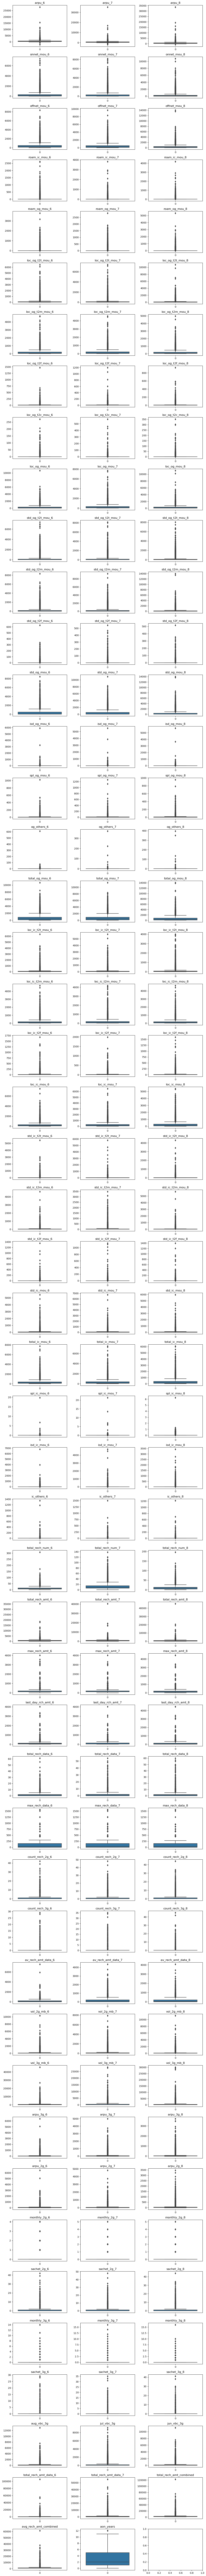

In [62]:
import seaborn as sns

variables = numericals1_df.columns.tolist()
nrows = (len(variables) + 2) // 3
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, len(numericals1_df.columns)))

for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.boxplot(data=numericals1_df[var].dropna(), ax=axs[row, col])
    axs[row, col].set_title(var)

# adjust spacing between subplots
plt.tight_layout()

# display the plot
plt.show()

In [63]:
# Removing outliers in case of numerical values
numericalcolumns=telecomchurnhighvalue.select_dtypes(exclude=['category']).columns
for col in numericalcolumns:
    q1 = telecomchurnhighvalue[col].quantile(0.10)
    q3 = telecomchurnhighvalue[col].quantile(0.90)
    iqr = q3-q1
    lowrange  = q1-1.5*iqr
    highrange = q3+1.5*iqr
    telecomchurnhighvalue1 = telecomchurnhighvalue.loc[(telecomchurnhighvalue[col]>lowrange) &(telecomchurnhighvalue[col]<highrange)]
telecomchurnhighvalue1.shape

(30001, 156)

In [64]:
telecomchurnhighvalue.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     558.490824    560.782203    508.597957    262.392728    269.374484   
std      460.640461    479.776947    501.961981    458.886532    479.263904   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      309.865000    309.826000    231.473000     20.010000     18.930000   
50%      481.694000    480.943000    427.585000     88.060000     86.885000   
75%      699.943000    698.315000    661.491000    290.440000    290.240000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   
mean     236.966438    377.865524    382.168481    342.809142      16.110355   
std      457.207614    480.262085    496.746629    478.194983      76.302156   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       15.630000     80.710000     78.540000     63.190000       0.000000   
50%       72.930000    229.635000    227.120000    197.590000       0.000000   
75%      239.960000    487.940000    494.010000    438.890000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       ...   sachet_3g_8    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g  \
count  ...  30001.000000  30001.000000  30001.000000  30001.000000   
mean   ...      0.202393    169.138860    178.872765    158.523962   
std    ...      1.100107    420.974354    443.544138    416.734860   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000    128.800000    137.290000     98.440000   
max    ...     41.000000  12916.220000   9165.600000  11166.210000   

       total_rech_amt_data_6  total_rech_amt_data_7  \
count           30001.000000           30001.000000   
mean              455.777166             528.233732   
std              1418.671074            1476.036563   
min                 0.000000               0.000000   
25%                 0.000000               0.000000   
50%                92.000000             100.000000   
75%               400.000000             575.000000   
max            105644.000000           55080.000000   

       total_rech_amt_combined_6 and 7  avg_rech_amt_combined_6 and 7  \
count                     30001.000000                   30001.000000   
mean                       2305.241257                    1152.620628   
std                        2717.427964                    1358.713982   
min                         956.000000                     478.000000   
25%                        1206.000000                     603.000000   
50%                        1600.000000                     800.000000   
75%                        2416.000000                    1208.000000   
max                      122472.000000                   61236.000000   

              churn     aon_years  
count  30001.000000  30001.000000  
mean       0.081364      3.337855  
std        0.273398      2.620557  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      2.000000  
75%        0.000000      5.000000  
max        1.000000     12.000000  

[8 rows x 150 columns]

In [65]:
telecomchurnhighvalue1.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     558.490824    560.782203    508.597957    262.392728    269.374484   
std      460.640461    479.776947    501.961981    458.886532    479.263904   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      309.865000    309.826000    231.473000     20.010000     18.930000   
50%      481.694000    480.943000    427.585000     88.060000     86.885000   
75%      699.943000    698.315000    661.491000    290.440000    290.240000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   
mean     236.966438    377.865524    382.168481    342.809142      16.110355   
std      457.207614    480.262085    496.746629    478.194983      76.302156   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       15.630000     80.710000     78.540000     63.190000       0.000000   
50%       72.930000    229.635000    227.120000    197.590000       0.000000   
75%      239.960000    487.940000    494.010000    438.890000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       ...   sachet_3g_8    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g  \
count  ...  30001.000000  30001.000000  30001.000000  30001.000000   
mean   ...      0.202393    169.138860    178.872765    158.523962   
std    ...      1.100107    420.974354    443.544138    416.734860   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000    128.800000    137.290000     98.440000   
max    ...     41.000000  12916.220000   9165.600000  11166.210000   

       total_rech_amt_data_6  total_rech_amt_data_7  \
count           30001.000000           30001.000000   
mean              455.777166             528.233732   
std              1418.671074            1476.036563   
min                 0.000000               0.000000   
25%                 0.000000               0.000000   
50%                92.000000             100.000000   
75%               400.000000             575.000000   
max            105644.000000           55080.000000   

       total_rech_amt_combined_6 and 7  avg_rech_amt_combined_6 and 7  \
count                     30001.000000                   30001.000000   
mean                       2305.241257                    1152.620628   
std                        2717.427964                    1358.713982   
min                         956.000000                     478.000000   
25%                        1206.000000                     603.000000   
50%                        1600.000000                     800.000000   
75%                        2416.000000                    1208.000000   
max                      122472.000000                   61236.000000   

              churn     aon_years  
count  30001.000000  30001.000000  
mean       0.081364      3.337855  
std        0.273398      2.620557  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      2.000000  
75%        0.000000      5.000000  
max        1.000000     12.000000  

[8 rows x 150 columns]

## Univariate Analysis

### Class imbalance identification

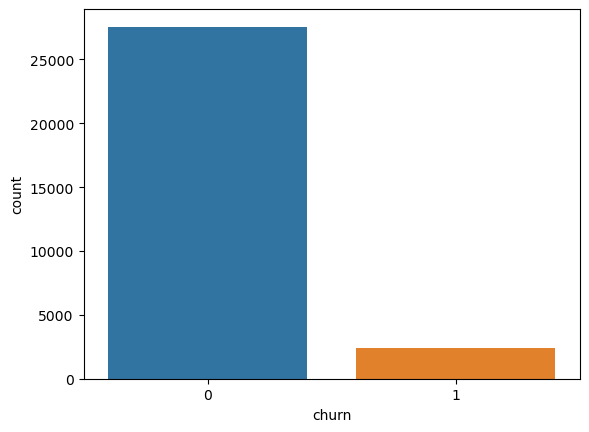

In [66]:
# Target Variable
sns.countplot(x='churn',data=telecomchurnhighvalue1)
plt.show()
# Large classimbalance

In [67]:
dataviz = telecomchurnhighvalue1
dataviz = dataviz.rename(columns={'total_rech_amt_combined_6 and 7':'total_rech_amt_combined','avg_rech_amt_combined_6 and 7':'avg_rech_amt_combined'})
dataviz.head(3)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803        88.06       86.885         0.00   
7  1069.180  1349.850  3171.480        57.84       54.680        52.29   
8   378.721   492.223   137.362       413.69      351.030        35.08   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  fb_user_8  \
0       229.635        227.12          0.00           0.00  ...        1.0   
7       453.430        567.16        325.91          16.23  ...        0.0   
8        94.660         80.63        136.48           0.00  ...        1.0   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  total_rech_amt_data_6  \
0       30.40        0.00      101.20                  252.0   
7       57.74       19.38       18.74                    0.0   
8       21.03      910.65      122.16                    0.0   

   total_rech_amt_data_7  total_rech_amt_combined  avg_rech_amt_combined  \
0                  252.0                   1118.0                  559.0   
7                    0.0                   2370.0                 1185.0   
8                  354.0                   1392.0                  696.0   

   churn  aon_years  
0      1        3.0  
7      1        2.0  
8      0        1.0  

[3 rows x 156 columns]

In [68]:
dataviz.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 156 columns):
 #    Column                   Dtype   
---   ------                   -----   
 0    arpu_6                   float64 
 1    arpu_7                   float64 
 2    arpu_8                   float64 
 3    onnet_mou_6              float64 
 4    onnet_mou_7              float64 
 5    onnet_mou_8              float64 
 6    offnet_mou_6             float64 
 7    offnet_mou_7             float64 
 8    offnet_mou_8             float64 
 9    roam_ic_mou_6            float64 
 10   roam_ic_mou_7            float64 
 11   roam_ic_mou_8            float64 
 12   roam_og_mou_6            float64 
 13   roam_og_mou_7            float64 
 14   roam_og_mou_8            float64 
 15   loc_og_t2t_mou_6         float64 
 16   loc_og_t2t_mou_7         float64 
 17   loc_og_t2t_mou_8         float64 
 18   loc_og_t2m_mou_6         float64 
 19   loc_og_t2m_mou_7         float64 
 20   loc_

In [69]:
numericals = [col for col in dataviz.columns if ('churn' not in col) and (dataviz[col].dtype in ['int64', 'float64'])]

In [70]:
numericals_df = dataviz[numericals]

In [71]:
categoricals = [col for col in dataviz.columns if ('churn' not in col) and (dataviz[col].dtype not in ['int64', 'float64'])]

In [72]:
categorical_df = dataviz[categoricals]
categorical_df.head(3)

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0              0.0              0.0              0.0       1.0       1.0   
7              0.0              0.0              0.0       0.0       0.0   
8              0.0              0.0              0.0       0.0       1.0   

  fb_user_8  
0       1.0  
7       0.0  
8       1.0

In [73]:
categorical_df.reset_index(inplace=True)

In [74]:
categorical_df = categorical_df.iloc[:,1:]
categorical_df.head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0              0.0              0.0              0.0       1.0       1.0   
1              0.0              0.0              0.0       0.0       0.0   
2              0.0              0.0              0.0       0.0       1.0   
3              0.0              0.0              0.0       0.0       0.0   
4              0.0              0.0              0.0       0.0       1.0   

  fb_user_8  
0       1.0  
1       0.0  
2       1.0  
3       0.0  
4       1.0

### Numerical Variables
#### Histograms

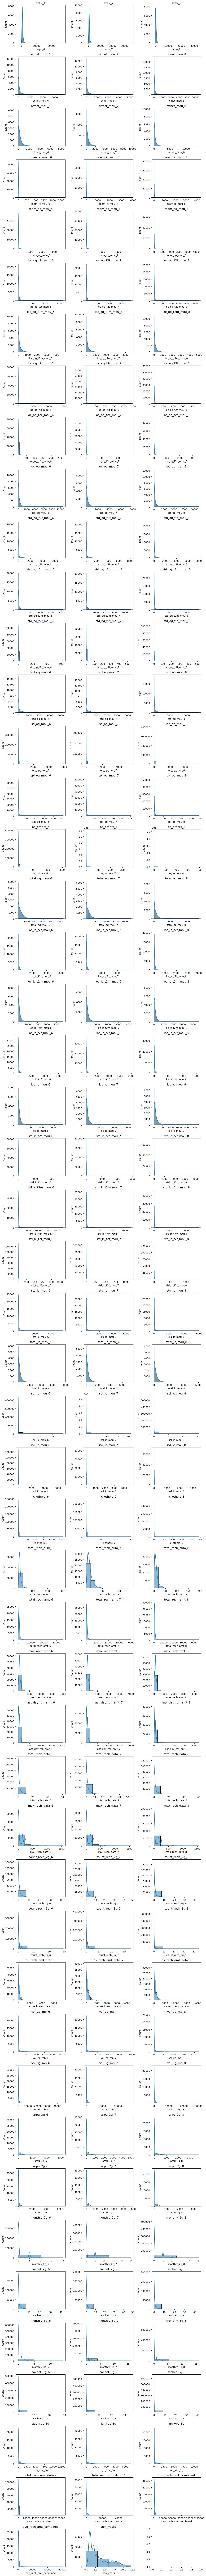

In [75]:
import math
import seaborn as sns

variables = numericals_df.columns.tolist()
nrows = (len(variables) + 2) // 3 # Update the calculation of nrows
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, len(numericals_df.columns)))

for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    n_values = numericals_df[var].dropna().shape[0]
    n_bins = int(round(numericals_df[var].nunique()**0.5))
    sns.histplot(data=numericals_df[var].dropna(), bins=n_bins, kde=True, ax=axs[row, col])
    axs[row, col].set_title(var)

# adjust spacing between subplots
plt.tight_layout()

# display the plot
plt.show()

### Categorical Variables
#### Count plot

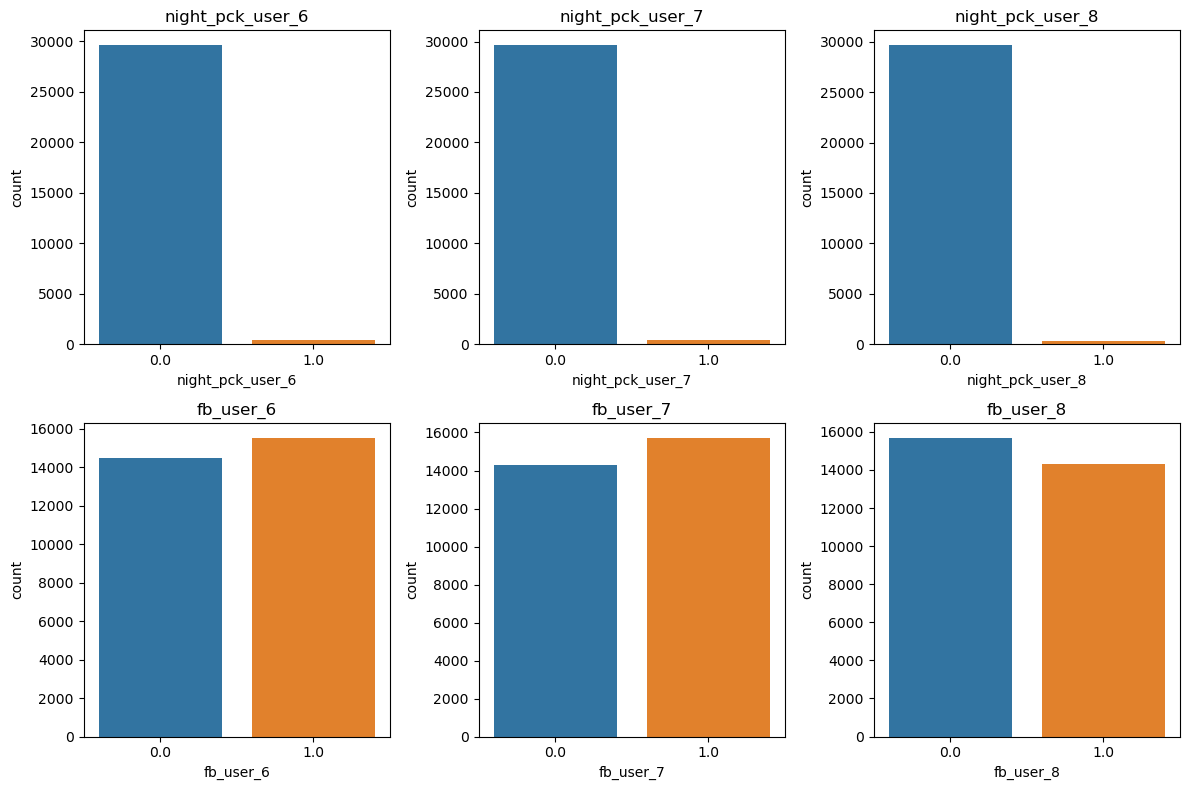

In [76]:
variables = categorical_df.columns.tolist()
nrows = 2
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 2 * nrows * len(categorical_df.columns) // ncols))

for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.countplot(data=categorical_df, x=var, ax=axs[row, col])
    axs[row, col].set_title(var)

# adjust spacing between subplots
plt.tight_layout()

# display the plot
plt.show()

## Bivariate Analysis

In [77]:
dataviz[numericals].head(3)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803        88.06       86.885         0.00   
7  1069.180  1349.850  3171.480        57.84       54.680        52.29   
8   378.721   492.223   137.362       413.69      351.030        35.08   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  sachet_3g_7  \
0       229.635        227.12          0.00           0.00  ...            0   
7       453.430        567.16        325.91          16.23  ...            0   
8        94.660         80.63        136.48           0.00  ...            0   

   sachet_3g_8  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  total_rech_amt_data_6  \
0            0       30.40        0.00      101.20                  252.0   
7            0       57.74       19.38       18.74                    0.0   
8            0       21.03      910.65      122.16                    0.0   

   total_rech_amt_data_7  total_rech_amt_combined  avg_rech_amt_combined  \
0                  252.0                   1118.0                  559.0   
7                    0.0                   2370.0                 1185.0   
8                  354.0                   1392.0                  696.0   

   aon_years  
0        3.0  
7        2.0  
8        1.0  

[3 rows x 149 columns]

### Numerical Variables 
#### Boxplot

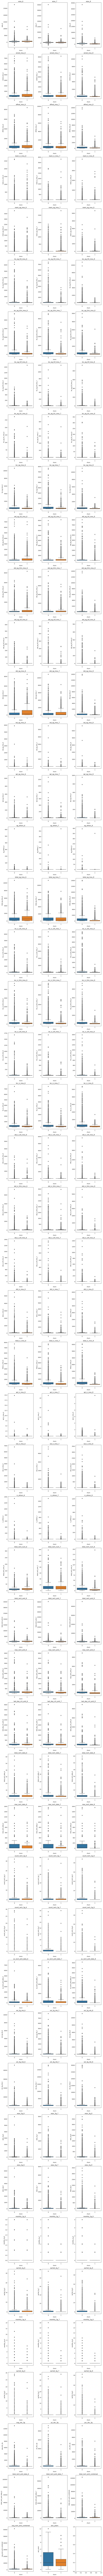

In [78]:
variables = numericals
nrows = (len(variables) + 2) // 3
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 2*len(variables)))

for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.boxplot(data=dataviz, x='churn', y=var, ax=axs[row, col])
    axs[row, col].set_title(var)

# adjust spacing between subplots
plt.tight_layout()

# display the plot
plt.show()

## Categorical Variables
### count plot

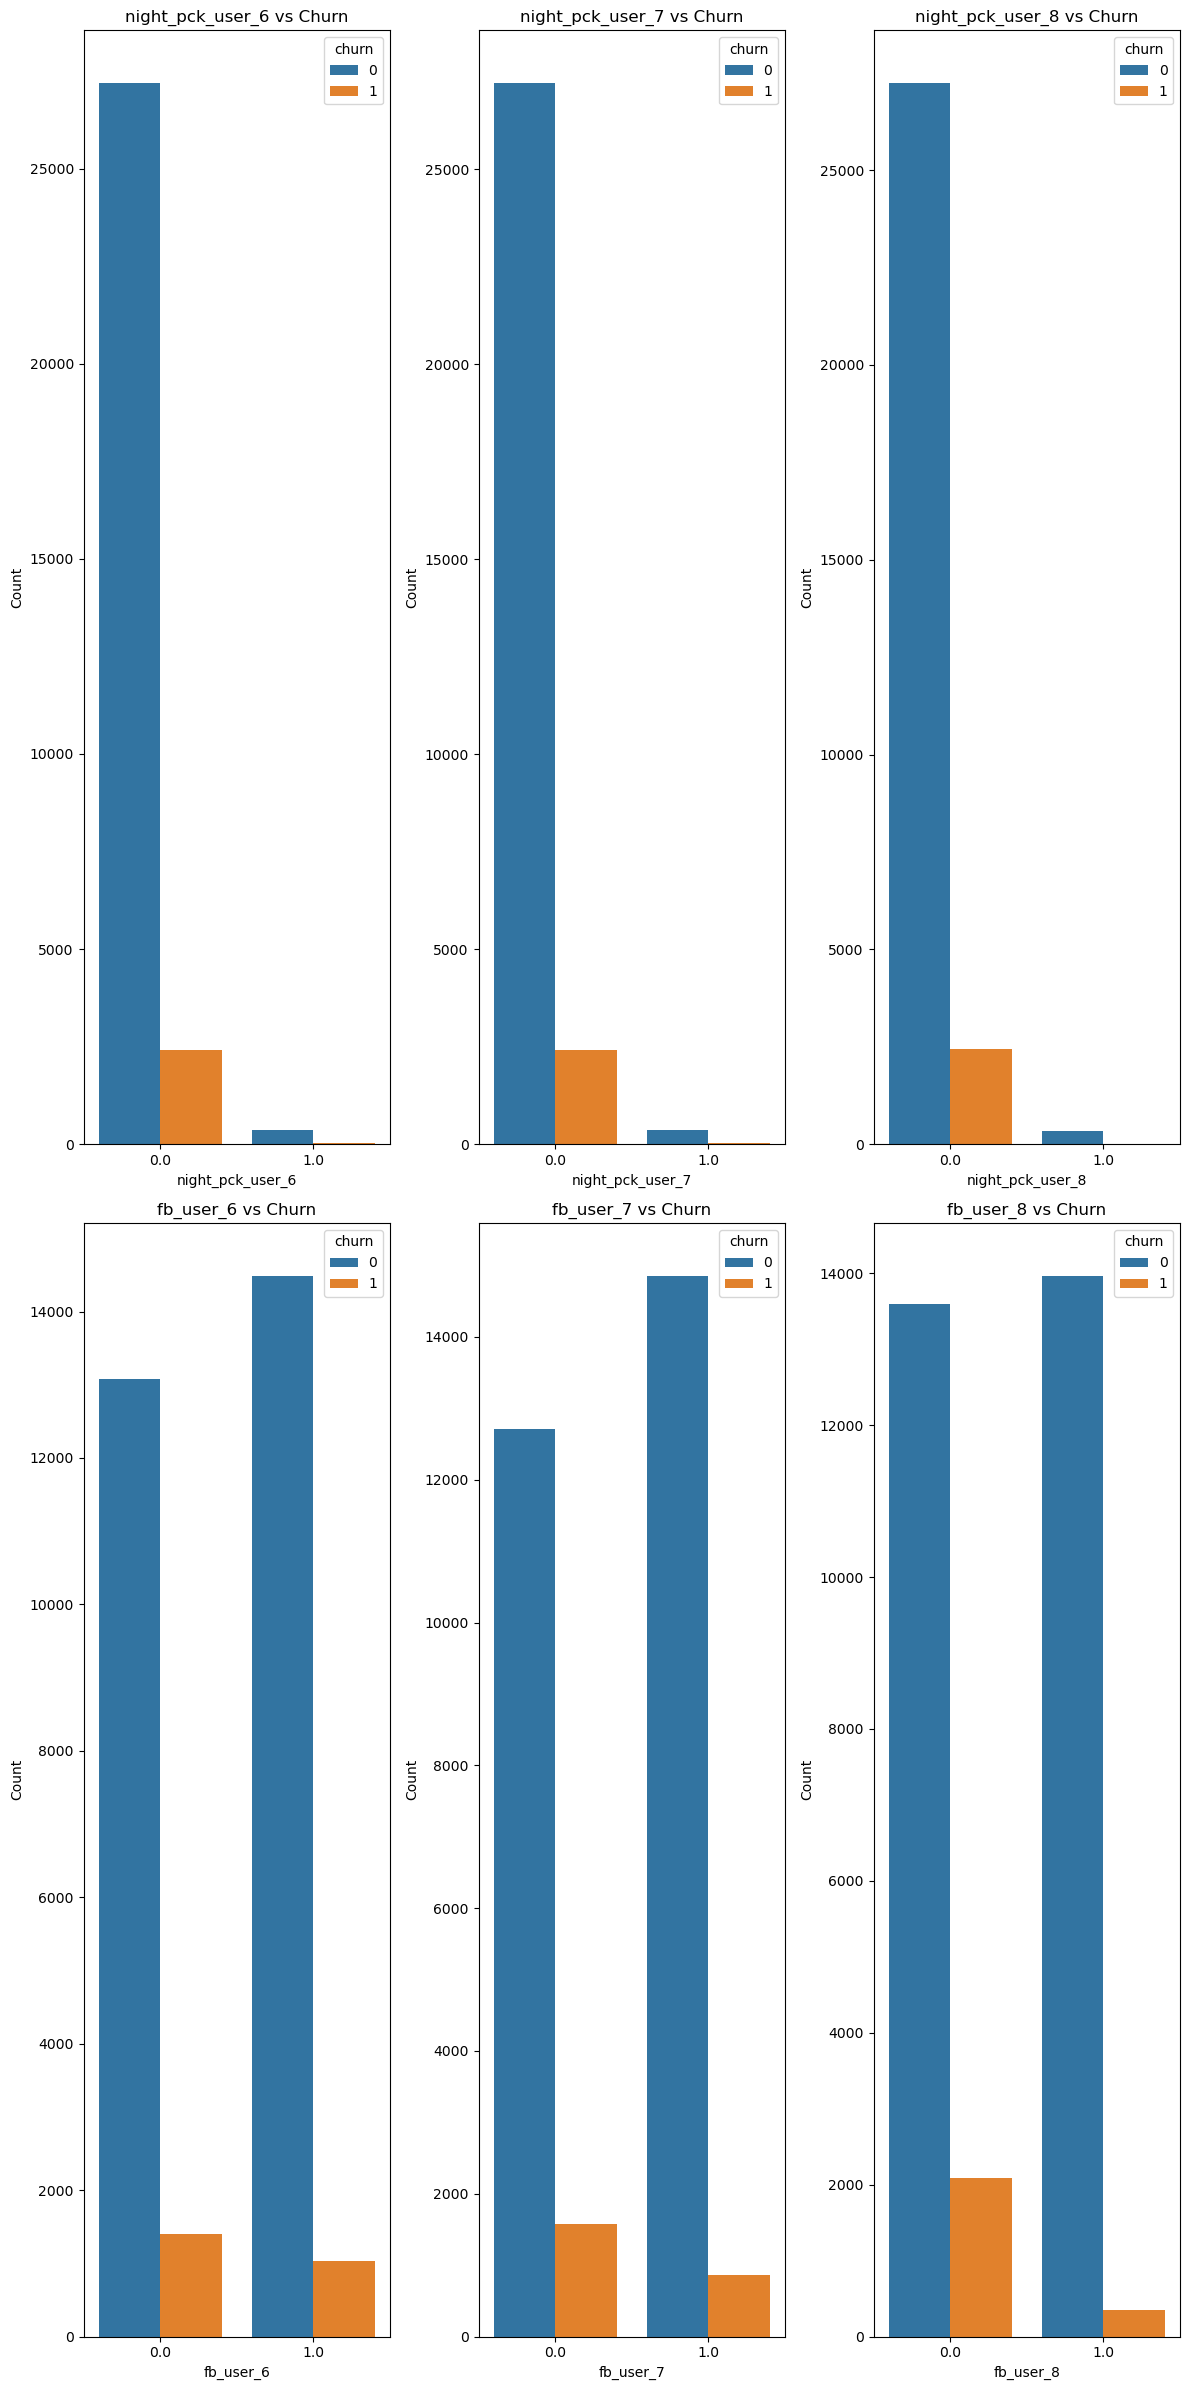

In [79]:
import seaborn as sns

variables = categorical_df.columns.tolist()
nrows = (len(variables) + 2) // 3
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * len(variables)))

for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.countplot(x=var, hue='churn', data=dataviz, ax=axs[row, col])
    axs[row, col].set_ylabel('Count')
    axs[row, col].set_title(f'{var} vs Churn')

# adjust spacing between subplots
plt.tight_layout()

# display the plot
plt.show()

#### Heatmap- Independent Variables Correlation with Target Variable

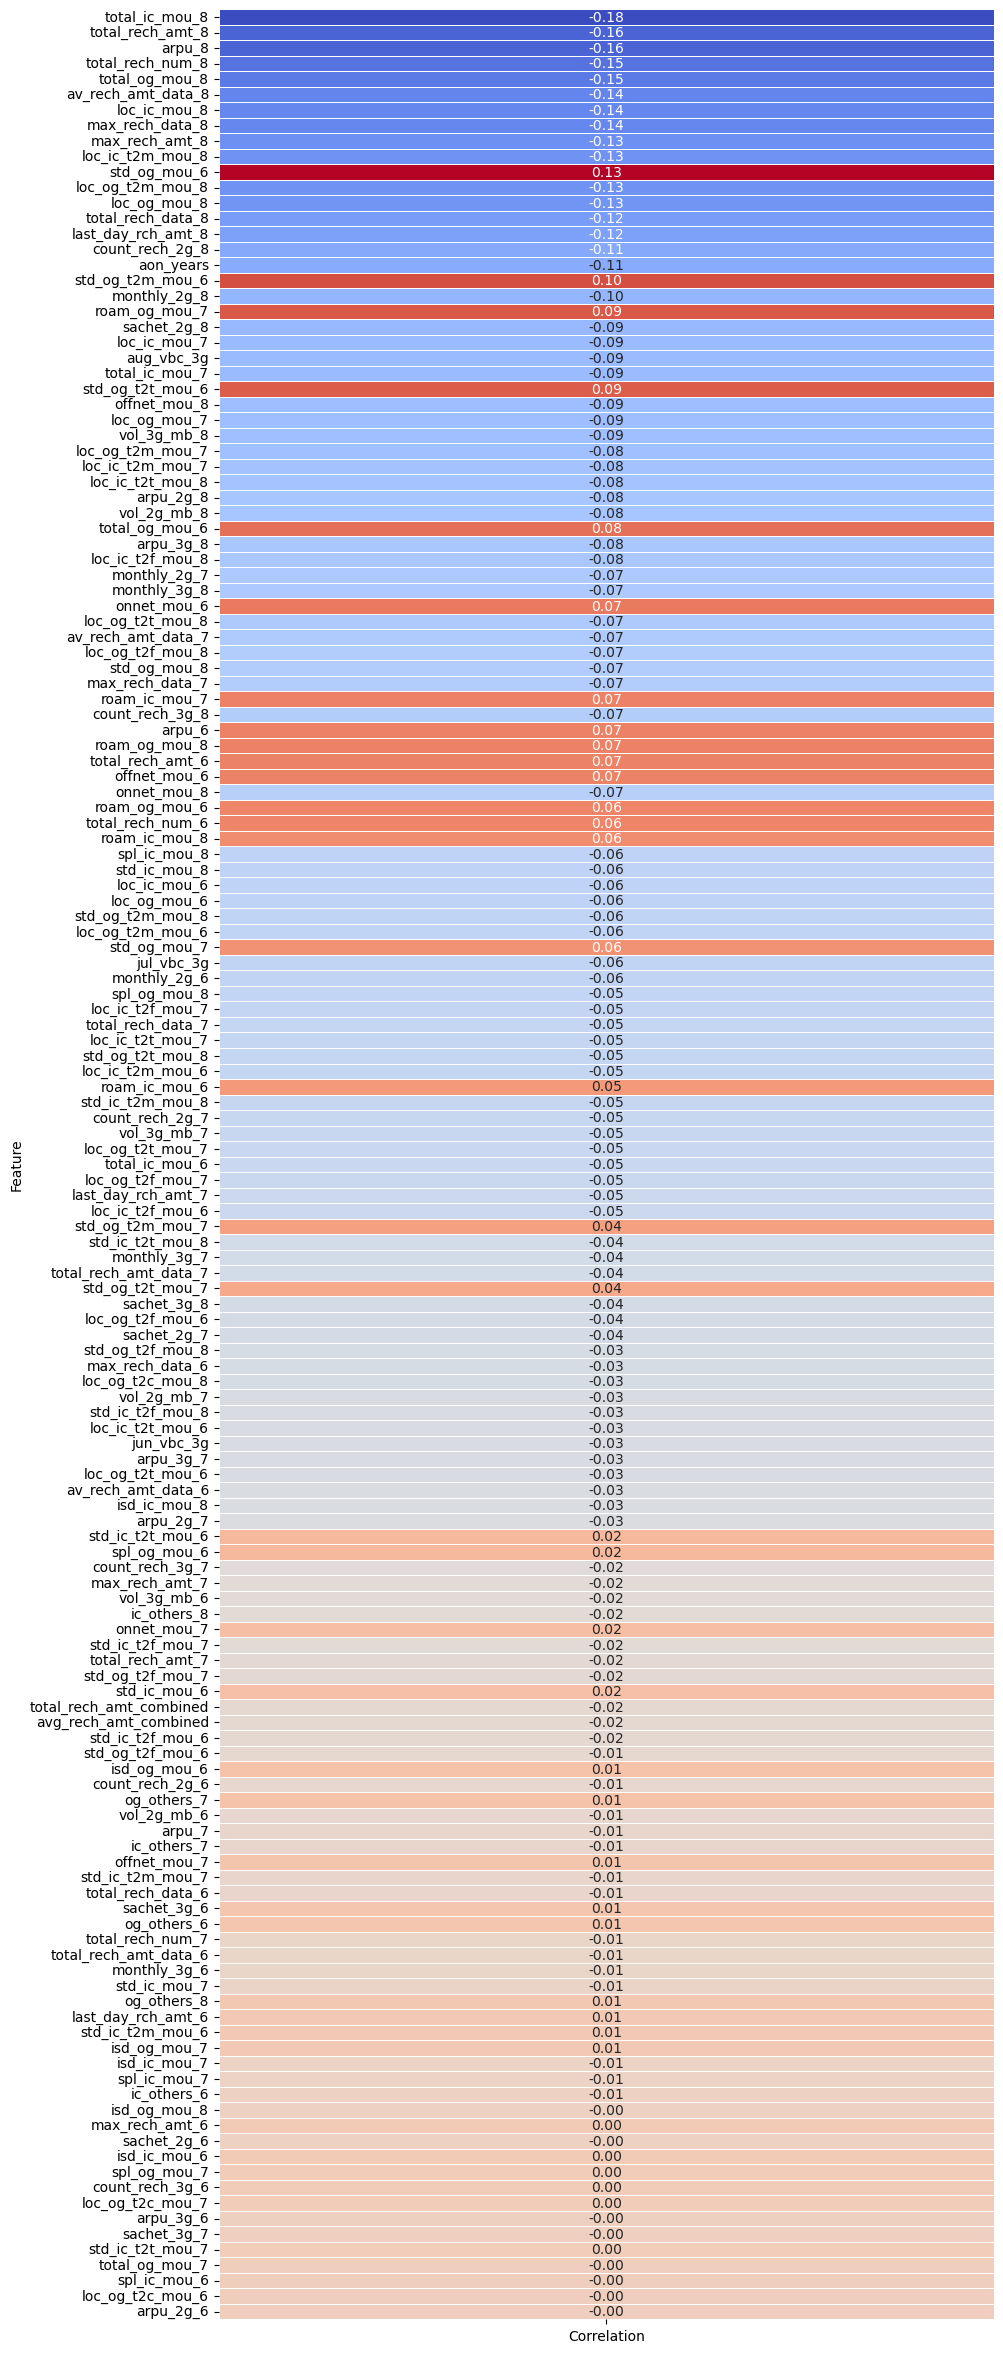

In [80]:
# Calculate the correlation between each numerical feature and the target variable 'churn'
correlations = dataviz[numericals].apply(lambda x: x.corr(dataviz['churn']))

# Create a DataFrame with the feature names and their respective correlation values
corr_df = pd.DataFrame({'Feature': correlations.index, 'Correlation': correlations.values})

# Sort the DataFrame by the absolute value of the correlation
corr_df = corr_df.reindex(corr_df.Correlation.abs().sort_values(ascending=False).index)

# Create the heatmap using this correlation DataFrame
plt.figure(figsize=(10, 30))
sns.heatmap(corr_df.set_index('Feature'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=False)
plt.show()

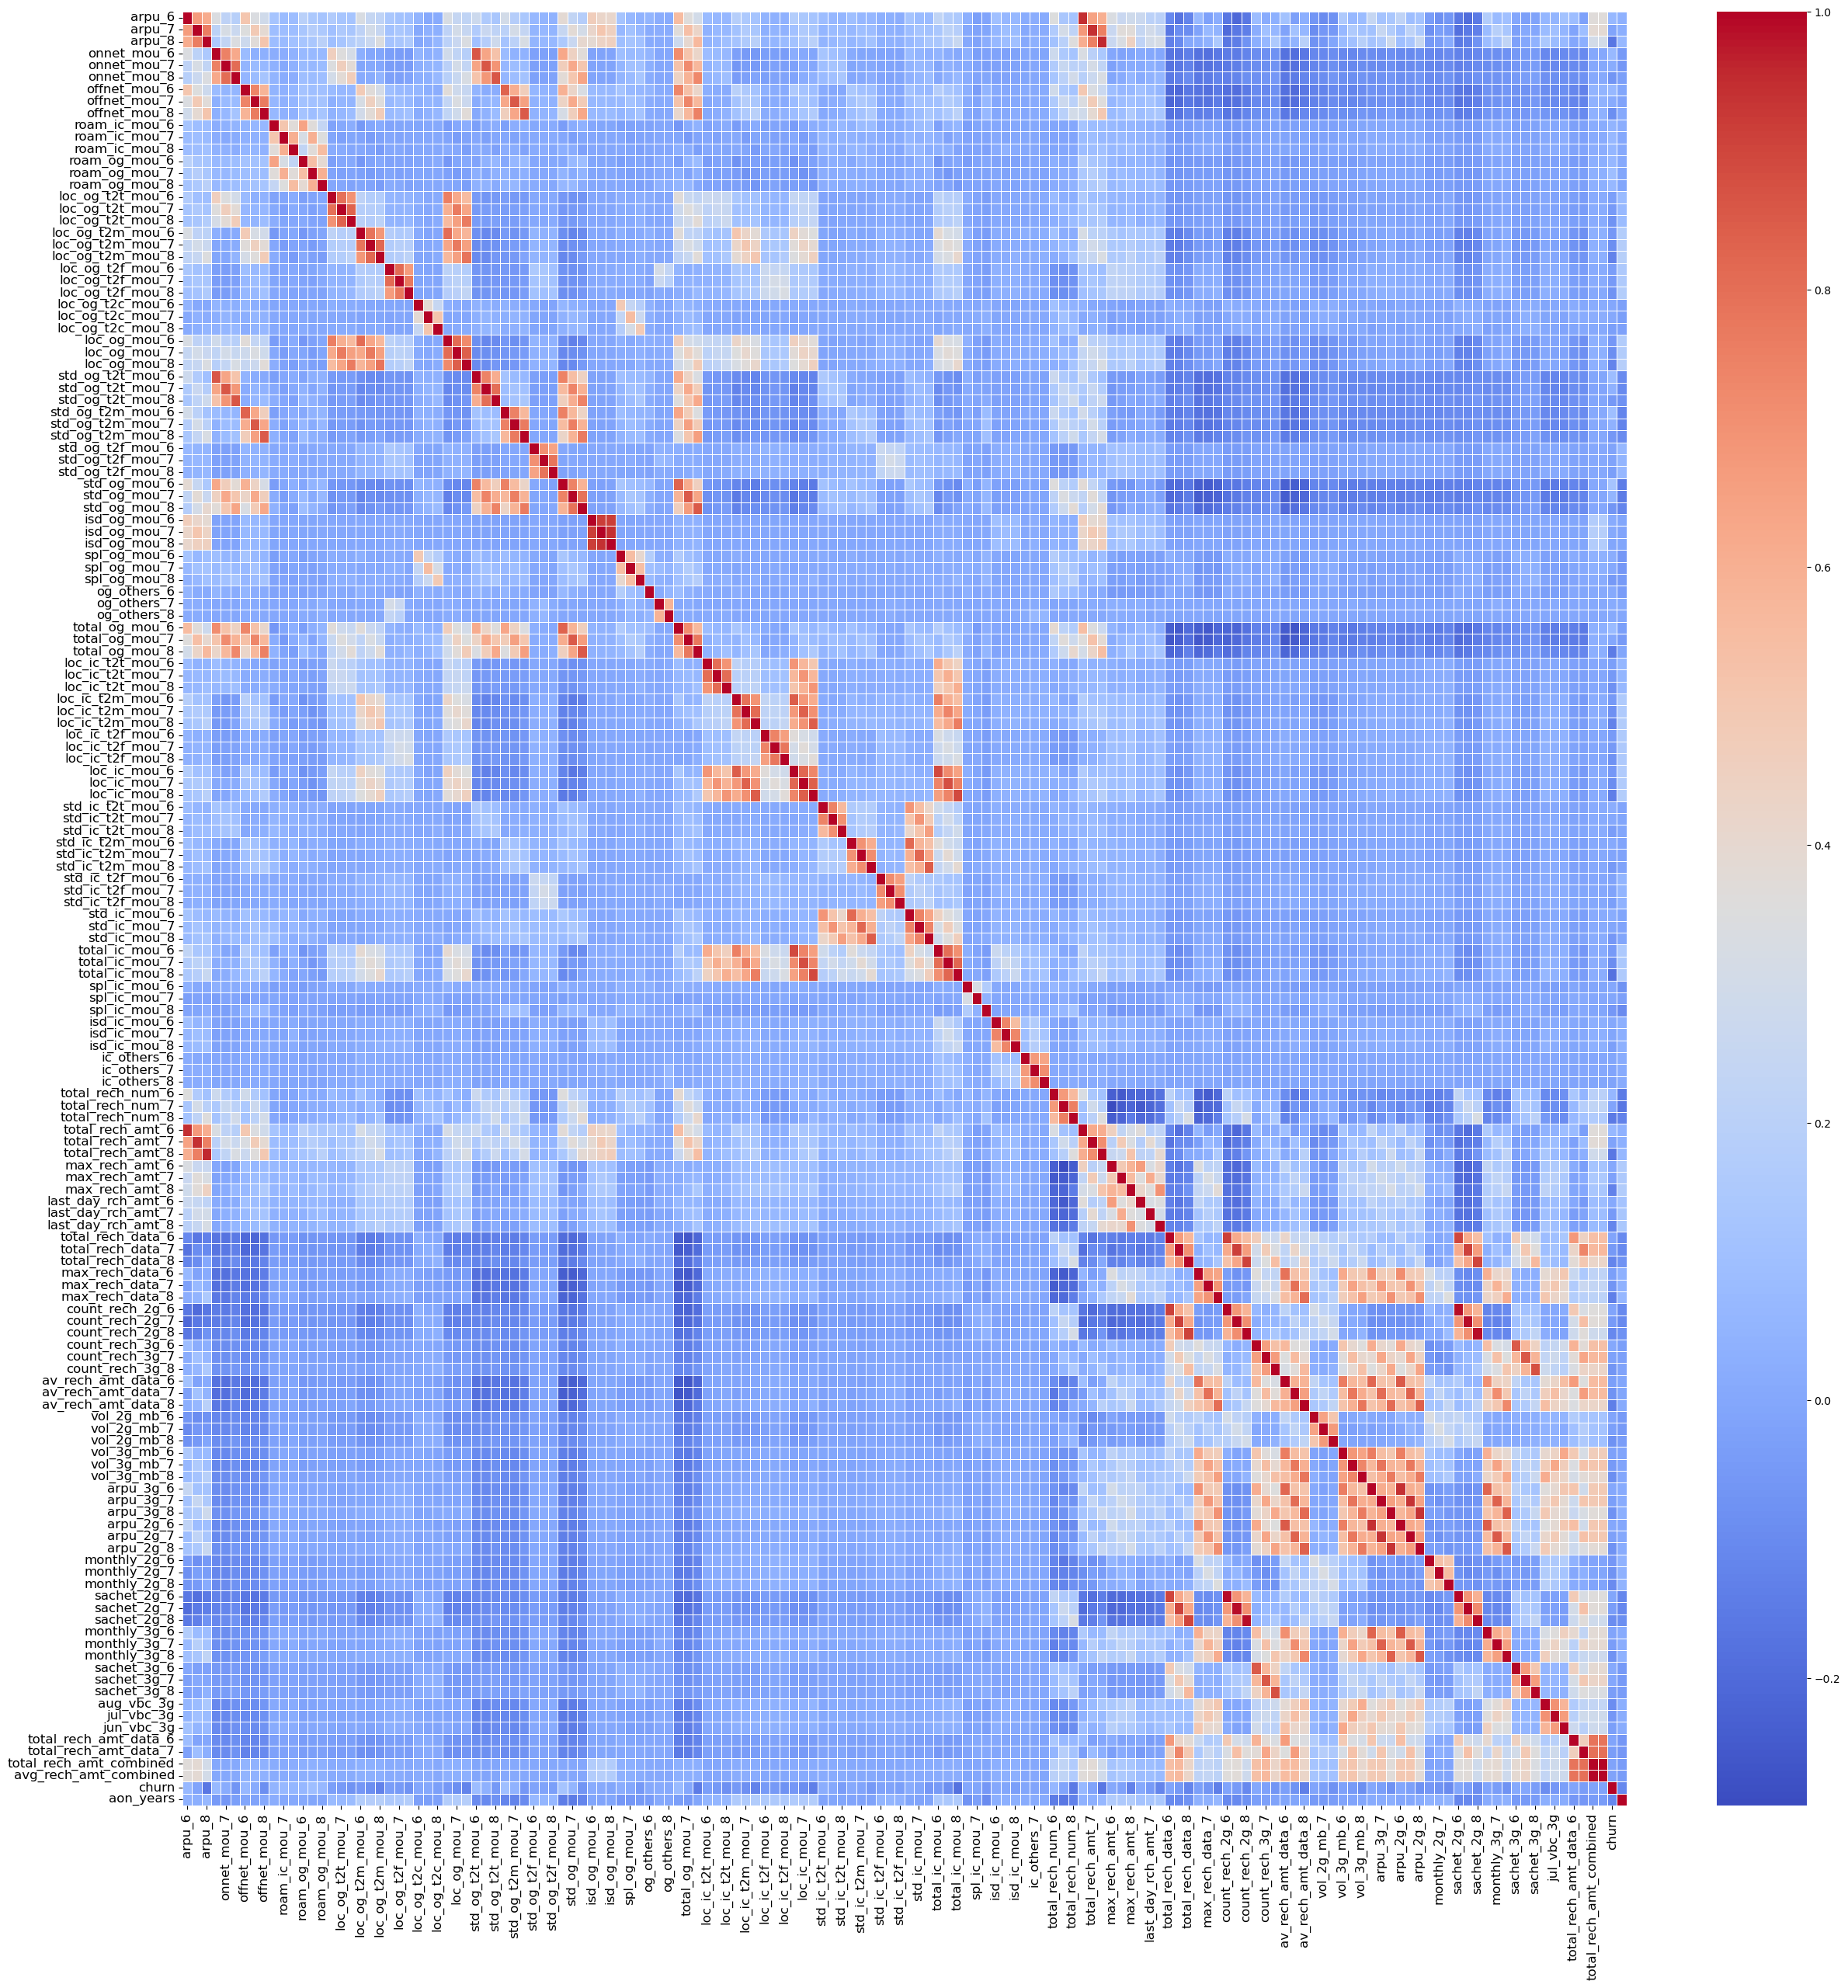

In [81]:
# Compute the correlation matrix for the entire dataset
correlation_matrix = dataviz.corr()

# Create the heatmap
plt.figure(figsize=(30, 30))
heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Increase the size of the x-axis and y-axis labels by 20%
xlabel_size = int(heatmap.xaxis.get_label().get_fontsize() * 1.2)
ylabel_size = int(heatmap.yaxis.get_label().get_fontsize() * 1.2)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=xlabel_size)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=ylabel_size)

plt.show()

# Model building

In [82]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
from sklearn.metrics import roc_auc_score

In [84]:
telecomchurnhighvalue1_train,telecomchurnhighvalue1_test=train_test_split(telecomchurnhighvalue1, train_size=0.7, test_size=0.3, random_state=100,stratify=telecomchurnhighvalue1.churn)

In [85]:
X_train=telecomchurnhighvalue1_train.drop('churn',axis=1)
X_test=telecomchurnhighvalue1_test.drop('churn',axis=1)

In [86]:
Y_train=telecomchurnhighvalue1_train['churn']
Y_test=telecomchurnhighvalue1_test['churn']

In [87]:
telecomchurnhighvalue1_train.churn.value_counts(normalize=True)

0    0.918619
1    0.081381
Name: churn, dtype: float64

In [88]:
telecomchurnhighvalue1_test.churn.value_counts(normalize=True)

0    0.918676
1    0.081324
Name: churn, dtype: float64

In [89]:
numericalcolumns1=telecomchurnhighvalue1.select_dtypes(exclude=['category','object']).columns
numericalcolumns2=numericalcolumns1.drop('churn')

In [90]:
numericalcolumns1

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_combined_6 and 7', 'avg_rech_amt_combined_6 and 7',
       'churn', 'aon_years'],
      dtype='object', length=150)

In [91]:
numericalcolumns2

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_combined_6 and 7', 'avg_rech_amt_combined_6 and 7',
       'aon_years'],
      dtype='object', length=149)

## Dealing with class imbalance and data normalization

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler=MinMaxScaler()
X_train[numericalcolumns2] = scaler.fit_transform(X_train[numericalcolumns2])
X_test[numericalcolumns2] = scaler.transform(X_test[numericalcolumns2])

In [94]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imbalanced-learn in c:\users\anushka\anaconda3\lib\site-packages (0.10.1)



In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
# Random UnderSampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_train_resampled_us, Y_train_resampled_us = under_sample.fit_resample(X_train, Y_train)
len(X_train_resampled_us)

3418

## Logistics regression

In [97]:
from collections import Counter
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn.feature_selection import RFECV

In [98]:
print(sorted(Counter(Y_train_resampled_us).items()))

[(0, 1709), (1, 1709)]


In [99]:
logreg = LogisticRegression(random_state=100)
rfecv=RFECV(estimator=logreg,cv=4)
rfecv.fit(X_train_resampled_us, Y_train_resampled_us)

RFECV(cv=4, estimator=LogisticRegression(random_state=100))

In [100]:
rfecv.n_features_

102

In [101]:
logreg = LogisticRegression(random_state=100)
rfe1=RFE(logreg,n_features_to_select=rfecv.n_features_)
rfe1=rfe1.fit(X_train_resampled_us, Y_train_resampled_us)

In [102]:
list(zip(X_train_resampled_us.columns, rfe1.support_, rfe1.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 23),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', False, 12),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_6', False, 9),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', True

In [103]:
column = X_train_resampled_us.columns[ rfe1.support_ ]

In [104]:
len(column)

102

In [105]:
logreg.fit(X_train_resampled_us[column], Y_train_resampled_us)

LogisticRegression(random_state=100)

In [106]:
Y_Test_pred_resampled_us_initiallogistic=logreg.predict(X_test[column])

In [107]:
Y_train_pred_resampled_us_initiallogistic=logreg.predict(X_train_resampled_us[column])

In [108]:
print ('Accuracy: ', accuracy_score(Y_train_resampled_us,Y_train_pred_resampled_us_initiallogistic))
print ('F1 score: ', f1_score(Y_train_resampled_us,Y_train_pred_resampled_us_initiallogistic))
print ('Recall: ', recall_score(Y_train_resampled_us,Y_train_pred_resampled_us_initiallogistic))
print ('Precision: ', precision_score(Y_train_resampled_us,Y_train_pred_resampled_us_initiallogistic))
print ('\n clasification report:\n', classification_report(Y_train_resampled_us,Y_train_pred_resampled_us_initiallogistic))
print ('\n confussion matrix:\n',confusion_matrix(Y_train_resampled_us,Y_train_pred_resampled_us_initiallogistic))

Accuracy:  0.8066120538326507
F1 score:  0.8090147356255418
Recall:  0.8191925102399064
Precision:  0.7990867579908676

 clasification report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1709
           1       0.80      0.82      0.81      1709

    accuracy                           0.81      3418
   macro avg       0.81      0.81      0.81      3418
weighted avg       0.81      0.81      0.81      3418


 confussion matrix:
 [[1357  352]
 [ 309 1400]]


In [109]:
print ('Accuracy: ', accuracy_score(Y_test,Y_Test_pred_resampled_us_initiallogistic))
print ('F1 score: ', f1_score(Y_test,Y_Test_pred_resampled_us_initiallogistic))
print ('Recall: ', recall_score(Y_test,Y_Test_pred_resampled_us_initiallogistic))
print ('Precision: ', precision_score(Y_test,Y_Test_pred_resampled_us_initiallogistic))
print ('\n clasification report:\n', classification_report(Y_test,Y_Test_pred_resampled_us_initiallogistic))
print ('\n confussion matrix:\n',confusion_matrix(Y_test,Y_Test_pred_resampled_us_initiallogistic))

Accuracy:  0.7820242195311632
F1 score:  0.37635092180546725
Recall:  0.8087431693989071
Precision:  0.2452361226180613

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87      8269
           1       0.25      0.81      0.38       732

    accuracy                           0.78      9001
   macro avg       0.61      0.79      0.62      9001
weighted avg       0.92      0.78      0.83      9001


 confussion matrix:
 [[6447 1822]
 [ 140  592]]


In [110]:
X_train_resampled_us_sm = sm.add_constant(X_train_resampled_us[column])

In [111]:
logregg1 = sm.GLM(Y_train_resampled_us, X_train_resampled_us_sm, family = sm.families.Binomial())

In [112]:
model1=logregg1.fit()

In [113]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3418
Model:                            GLM   Df Residuals:                     3319
Model Family:                Binomial   Df Model:                           98
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1258.9
Date:                Tue, 09 May 2023   Deviance:                       2517.9
Time:                        21:16:41   Pearson chi2:                 6.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4778
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.1297      1.833     -0.616      0.538      -4.723       2.464
arpu_6                            -15.3413     12.972     -1.183      0.237     -40.766      10.084
arpu_7                             29.5598     18.896      1.564      0.118      -7.475      66.595
arpu_8                             40.0965     17.779      2.255      0.024       5.250      74.943
onnet_mou_6                         0.9102      2.661      0.342      0.732      -4.306       6.126
onnet_mou_7                         0.3369     64.698      0.005      0.996    -126.469     127.143
onnet_mou_8                        29.0794     97.821      0.297      0.766    -162.646     220.805
offnet_mou_6                       16.7124      8.996      1.858      0.063      -0.920      34.345
offnet_mou_7                      -18.5081     64.550     -0.287      0.774    -145.023     108.007
offnet_mou_8                       29.9410    127.039      0.236      0.814    -219.052     278.934
roam_ic_mou_6                       0.3690      3.149      0.117      0.907      -5.803       6.541
roam_ic_mou_7                       6.9642      5.128      1.358      0.174      -3.087      17.016
roam_ic_mou_8                       1.6966      2.002      0.847      0.397      -2.227       5.620
roam_og_mou_6                      -6.0719      3.262     -1.861      0.063     -12.466       0.322
roam_og_mou_7                      10.3359     22.085      0.468      0.640     -32.950      53.621
roam_og_mou_8                     -16.6213     48.636     -0.342      0.733    -111.946      78.704
loc_og_t2t_mou_7                 1.999e+04   5.52e+04      0.362      0.717   -8.82e+04    1.28e+05
loc_og_t2t_mou_8                -2.349e+04   9.29e+04     -0.253      0.800   -2.06e+05    1.59e+05
loc_og_t2m_mou_6                  -16.7974      6.728     -2.497      0.013     -29.985      -3.610
loc_og_t2m_mou_7                 1.272e+04   3.51e+04      0.362      0.717   -5.61e+04    8.15e+04
loc_og_t2m_mou_8                -1.082e+04   4.29e+04     -0.252      0.801   -9.49e+04    7.32e+04
loc_og_t2f_mou_6                   -1.6291      4.310     -0.378      0.705     -10.077       6.819
loc_og_t2f_mou_7                 2955.8003   8149.678      0.363      0.717    -1.3e+04    1.89e+04
loc_og_t2f_mou_8                -2037.7141   8026.642     -0.254      0.800   -1.78e+04    1.37e+04
loc_og_t2c_mou_6                   -3.0938      2.672     -1.158      0.247      -8.330       2.142
loc_og_t2c_mou_8                    5.3229      3.702      1.438      0.150      -1.932      12.578
loc_og_mou_7                    -2.088e+04   5.76e+04     -0.362      0.717   -1.34e+05    9.21e+04
loc_og_mou_8                      2.41e+04   9.54e+04      0.252      0.801   -1.63

In [114]:
vif=pd.DataFrame()
vif['Features']=X_train_resampled_us[column].columns
vif['VIF']=[variance_inflation_factor(X_train_resampled_us[column].values,i)for i in range(X_train_resampled_us[column].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features           VIF
78                   count_rech_3g_8           inf
89                      monthly_2g_8           inf
91                      monthly_3g_7           inf
77                   count_rech_3g_7           inf
94                       sachet_3g_7           inf
100    avg_rech_amt_combined_6 and 7           inf
90                       sachet_2g_8           inf
99   total_rech_amt_combined_6 and 7           inf
75                   count_rech_2g_8           inf
71                 total_rech_data_8           inf
37                      std_og_mou_8  1.629115e+10
36                      std_og_mou_7  1.141274e+10
32                  std_og_t2m_mou_8  6.979225e+09
29                  std_og_t2t_mou_8  6.105500e+09
31                  std_og_t2m_mou_7  4.638707e+09
28                  std_og_t2t_mou_7  4.602237e+09
26                      loc_og_mou_8  4.291562e+09
25                      loc_og_mou_7  3.896361e+09
50                      loc_ic_mou_8  2.848208e+09
19                  loc_og_t2m_mou_8  1.674331e+09
18                  loc_og_t2m_mou_7  1.569925e+09
16                  loc_og_t2t_mou_8  1.456683e+09
46                  loc_ic_t2m_mou_8  1.424394e+09
15                  loc_og_t2t_mou_7  1.321415e+09
43                  loc_ic_t2t_mou_8  4.518103e+08
48                  loc_ic_t2f_mou_8  3.827444e+07
22                  loc_og_t2f_mou_8  1.843384e+07
21                  loc_og_t2f_mou_7  1.747631e+07
34                  std_og_t2f_mou_8  4.470803e+06
33                  std_og_t2f_mou_7  2.729118e+06
41                    total_og_mou_8  1.706533e+04
35                      std_og_mou_6  1.116294e+04
40                    total_og_mou_7  7.879020e+03
8                       offnet_mou_8  7.488750e+03
5                        onnet_mou_8  6.030530e+03
7                       offnet_mou_7  5.097350e+03
4                        onnet_mou_7  4.538540e+03
27                  std_og_t2t_mou_6  4.529830e+03
30                  std_og_t2m_mou_6  4.216250e+03
14                     roam_og_mou_8  8.632600e+02
56                    total_ic_mou_6  5.481500e+02
49                      loc_ic_mou_6  3.860600e+02
13                     roam_og_mou_7  2.795300e+02
6                       offnet_mou_6  2.305300e+02
0                             arpu_6  2.200400e+02
1                             arpu_7  2.187800e+02
2                             arpu_8  1.400300e+02
57                    total_ic_mou_7  5.171000e+01
58                    total_ic_mou_8  4.937000e+01
60                      isd_ic_mou_6  4.462000e+01
17                  loc_og_t2m_mou_6  4.371000e+01
54                      std_ic_mou_6  4.298000e+01
63                  total_rech_amt_6  2.850000e+01
65                  total_rech_amt_8  2.644000e+01
45                  loc_ic_t2m_mou_7  2.459000e+01
64                  total_rech_amt_7  2.434000e+01
3                        onnet_mou_6  1.983000e+01
76                   count_rech_3g_6  1.922000e+01
84                         arpu_2g_7  1.877000e+01
83                         arpu_3g_7  1.789000e+01
44                  loc_ic_t2m_mou_6  1.286000e+01
79                av_rech_amt_data_8  1.261000e+01
42                  loc_ic_t2t_mou_7  1.244000e+01
93                       sachet_3g_6  1.196000e+01
82                         arpu_3g_6  9.320000e+00
12                     roam_og_mou_6  9.140000e+00
74                   max_rech_data_8  8.830000e+00
72                   max_rech_data_6  8.120000e+00
73                   max_rech_data_7  7.840000e+00
66                    max_rech_amt_6  7.840000e+00
61                  total_rech_num_7  7.650000e+00
55                      std_ic_mou_8  7.570000e+00
62                  total_rech_num_8  7.280000e+00
68                    max_rech_amt_8  6.420000e+00
67                    max_rech_amt_7  6.060000e+00
53                  std_ic_t2m_mou_7  5.930000e+00
96                         fb_user_8  5.820000e+00
92                      monthly_3g_8  5.780000e+00

Dropping high p and high VIF
Then dropping in steps high p and low VIF and low p value and high VIF variables 

In [115]:
X_train_resampled_us_rfe1=X_train_resampled_us[column].drop(['monthly_3g_7','count_rech_3g_7','sachet_3g_7','avg_rech_amt_combined_6 and 7','sachet_2g_8','total_rech_amt_combined_6 and 7','std_og_mou_7','std_og_t2m_mou_7','loc_og_mou_8','loc_og_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_7','total_og_mou_8','std_og_mou_6','total_og_mou_7','offnet_mou_8','offnet_mou_7','onnet_mou_8','onnet_mou_7','std_og_t2t_mou_6','std_og_t2m_mou_6','roam_og_mou_8','total_ic_mou_6','roam_og_mou_7','arpu_6','arpu_7','total_ic_mou_7','total_ic_mou_8','isd_ic_mou_6','total_rech_amt_8','loc_ic_t2m_mou_7','total_rech_amt_7','count_rech_3g_6','arpu_2g_7','arpu_3g_7','loc_ic_t2m_mou_6','loc_ic_t2t_mou_7','sachet_3g_6','arpu_3g_6','max_rech_data_8','max_rech_data_7','max_rech_data_6','std_ic_mou_8','max_rech_amt_7','monthly_3g_8','fb_user_6','sachet_3g_7'],axis=1)

In [116]:
X_train_resampled_us_rfe3=sm.add_constant(X_train_resampled_us_rfe1)

In [117]:
logm2=sm.GLM(Y_train_resampled_us,X_train_resampled_us_rfe3,family=sm.families.Binomial())
model2=logm2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3418
Model:                            GLM   Df Residuals:                     3366
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1319.9
Date:                Tue, 09 May 2023   Deviance:                       2639.8
Time:                        21:16:49   Pearson chi2:                 7.40e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4588
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3096      0.255      1.212      0.225      -0.191       0.810
arpu_8                 9.3278      7.940      1.175      0.240      -6.235      24.891
onnet_mou_6           -0.0590      1.022     -0.058      0.954      -2.063       1.945
offnet_mou_6           3.0295      1.113      2.721      0.007       0.848       5.211
roam_ic_mou_6         -1.9634      2.704     -0.726      0.468      -7.263       3.337
roam_ic_mou_7         12.8744      3.935      3.272      0.001       5.163      20.586
roam_ic_mou_8          2.1868      1.986      1.101      0.271      -1.706       6.079
roam_og_mou_6          0.9277      1.597      0.581      0.561      -2.202       4.057
loc_og_t2m_mou_6      -8.7524      1.546     -5.660      0.000     -11.783      -5.722
loc_og_t2f_mou_6      -6.0059      2.817     -2.132      0.033     -11.528      -0.484
loc_og_t2c_mou_6      -2.1970      2.480     -0.886      0.376      -7.057       2.663
loc_og_t2c_mou_8       5.1132      3.413      1.498      0.134      -1.577      11.803
std_og_t2t_mou_7       5.2637      1.720      3.060      0.002       1.892       8.636
std_og_t2t_mou_8   -2.138e+05   6.15e+04     -3.477      0.001   -3.34e+05   -9.33e+04
std_og_t2m_mou_8   -4.002e+05   1.15e+05     -3.477      0.001   -6.26e+05   -1.75e+05
std_og_t2f_mou_7       3.7961      4.756      0.798      0.425      -5.526      13.118
std_og_t2f_mou_8   -1.484e+04   4264.865     -3.479      0.001   -2.32e+04   -6476.580
std_og_mou_8         4.01e+05   1.15e+05      3.477      0.001    1.75e+05    6.27e+05
isd_og_mou_6           9.1603     16.974      0.540      0.589     -24.108      42.428
spl_og_mou_8          -6.5520      4.546     -1.441      0.150     -15.462       2.358
loc_ic_t2t_mou_8    8.658e+04   2.51e+04      3.455      0.001    3.75e+04    1.36e+05
loc_ic_t2m_mou_8    1.004e+05   2.91e+04      3.455      0.001    4.35e+04    1.57e+05
loc_ic_t2f_mou_6      -6.5600      2.535     -2.588      0.010     -11.528      -1.592
loc_ic_t2f_mou_8    2.833e+04   8198.305      3.456      0.001    1.23e+04    4.44e+04
loc_ic_mou_6          16.8542      2.920      5.772      0.000      11.131      22.577
loc_ic_mou_8       -1.166e+05   3.37e+04     -3.456      0.001   -1.83e+05   -5.05e+04
std_ic_t2t_mou_6       6.3866      6.924      0.922      0.356      -7.185      19.958
std_ic_t2t_mou_8     -17.7496      6.069     -2.925      0.003     -29.645      -5.855
std_ic_t2m_mou_7      -3.9785      2.448     -1.625      0.104      -8.776       0.819
std_ic_mou_6           1.5643      4.853      0.322      0.747      -7.947      11.076
spl_ic_mou_8          -5.5733      1.115     -4.998      0.000      -7.759      -3.388
total_rech_num_7       6.9523      1.179      5.897      0.000       4.642       9.263
total_rech_num_8     -12.5470      2.2

In [118]:
vif1=pd.DataFrame()
vif1['Features']=X_train_resampled_us_rfe1.columns
vif1['VIF']=[variance_inflation_factor(X_train_resampled_us_rfe1.values,i)for i in range(X_train_resampled_us_rfe1.shape[1])]
vif1['VIF']=round(vif1['VIF'],2)
vif1=vif1.sort_values(by='VIF',ascending=False)
vif1

Features           VIF
37   total_rech_data_8           inf
39     count_rech_3g_8           inf
38     count_rech_2g_8           inf
16        std_og_mou_8  1.185459e+10
13    std_og_t2m_mou_8  5.078633e+09
12    std_og_t2t_mou_8  4.442835e+09
24        loc_ic_mou_8  1.893162e+09
20    loc_ic_t2m_mou_8  9.467814e+08
19    loc_ic_t2t_mou_8  3.003133e+08
22    loc_ic_t2f_mou_8  2.544070e+07
15    std_og_t2f_mou_8  3.253185e+06
0               arpu_8  1.334000e+01
32    total_rech_amt_6  1.120000e+01
33      max_rech_amt_6  5.640000e+00
31    total_rech_num_8  5.100000e+00
30    total_rech_num_7  4.620000e+00
34      max_rech_amt_8  3.940000e+00
40  av_rech_amt_data_8  3.880000e+00
28        std_ic_mou_6  3.850000e+00
11    std_og_t2t_mou_7  3.680000e+00
48           fb_user_8  3.680000e+00
2         offnet_mou_6  3.590000e+00
23        loc_ic_mou_6  3.410000e+00
14    std_og_t2f_mou_7  3.390000e+00
35  last_day_rch_amt_6  3.320000e+00
3        roam_ic_mou_6  3.210000e+00
1          onnet_mou_6  3.200000e+00
4        roam_ic_mou_7  2.940000e+00
25    std_ic_t2t_mou_6  2.780000e+00
51           aon_years  2.640000e+00
36  last_day_rch_amt_8  2.450000e+00
7     loc_og_t2m_mou_6  2.150000e+00
47        monthly_2g_8  2.100000e+00
49          aug_vbc_3g  2.100000e+00
42         vol_2g_mb_8  2.080000e+00
6        roam_og_mou_6  2.080000e+00
41         vol_2g_mb_7  2.060000e+00
46        monthly_2g_7  2.030000e+00
5        roam_ic_mou_8  1.910000e+00
27    std_ic_t2m_mou_7  1.890000e+00
50          jun_vbc_3g  1.790000e+00
45        monthly_2g_6  1.700000e+00
17        isd_og_mou_6  1.660000e+00
21    loc_ic_t2f_mou_6  1.660000e+00
18        spl_og_mou_8  1.590000e+00
10    loc_og_t2c_mou_8  1.540000e+00
8     loc_og_t2f_mou_6  1.500000e+00
26    std_ic_t2t_mou_8  1.370000e+00
44    night_pck_user_8  1.340000e+00
9     loc_og_t2c_mou_6  1.230000e+00
43    night_pck_user_6  1.180000e+00
29        spl_ic_mou_8  1.080000e+00

In [119]:
# High VIF high p value
X_train_resampled_us_rfe4=X_train_resampled_us_rfe1.drop(['arpu_8','onnet_mou_6','roam_ic_mou_6','roam_ic_mou_8','roam_og_mou_6','loc_og_t2c_mou_6','loc_og_t2c_mou_8','std_og_t2f_mou_7','isd_og_mou_6','spl_og_mou_8','std_ic_t2t_mou_6','std_ic_t2m_mou_7','std_ic_mou_6','max_rech_amt_6','last_day_rch_amt_6','total_rech_data_8','count_rech_3g_8','vol_2g_mb_8','night_pck_user_6','night_pck_user_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','aug_vbc_3g','jun_vbc_3g'],axis=1)

In [120]:
X_train_resampled_us_rfe5=sm.add_constant(X_train_resampled_us_rfe4)

In [121]:
logm3=sm.GLM(Y_train_resampled_us,X_train_resampled_us_rfe5,family=sm.families.Binomial())
model3=logm3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3418
Model:                            GLM   Df Residuals:                     3390
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1342.9
Date:                Tue, 09 May 2023   Deviance:                       2685.8
Time:                        21:16:52   Pearson chi2:                 4.29e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4515
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5342      0.131      4.064      0.000       0.277       0.792
offnet_mou_6           2.5284      1.004      2.519      0.012       0.561       4.496
roam_ic_mou_7         14.1328      3.183      4.440      0.000       7.894      20.372
loc_og_t2m_mou_6      -8.6235      1.510     -5.711      0.000     -11.583      -5.664
loc_og_t2f_mou_6      -5.9416      2.788     -2.131      0.033     -11.406      -0.477
std_og_t2t_mou_7       4.9481      1.525      3.244      0.001       1.959       7.937
std_og_t2t_mou_8   -2.203e+05   6.05e+04     -3.644      0.000   -3.39e+05   -1.02e+05
std_og_t2m_mou_8   -4.123e+05   1.13e+05     -3.644      0.000   -6.34e+05   -1.91e+05
std_og_t2f_mou_8   -1.528e+04   4192.944     -3.645      0.000   -2.35e+04   -7065.323
std_og_mou_8        4.132e+05   1.13e+05      3.644      0.000    1.91e+05    6.35e+05
loc_ic_t2t_mou_8    8.923e+04   2.46e+04      3.621      0.000    4.09e+04    1.38e+05
loc_ic_t2m_mou_8    1.035e+05   2.86e+04      3.622      0.000    4.75e+04     1.6e+05
loc_ic_t2f_mou_6      -5.6898      2.519     -2.258      0.024     -10.628      -0.752
loc_ic_t2f_mou_8     2.92e+04   8060.251      3.622      0.000    1.34e+04     4.5e+04
loc_ic_mou_6          16.3937      2.819      5.815      0.000      10.868      21.919
loc_ic_mou_8       -1.201e+05   3.32e+04     -3.622      0.000   -1.85e+05   -5.51e+04
std_ic_t2t_mou_8     -13.7884      5.154     -2.675      0.007     -23.890      -3.687
spl_ic_mou_8          -5.6063      1.102     -5.087      0.000      -7.766      -3.446
total_rech_num_7       6.9079      1.142      6.049      0.000       4.669       9.146
total_rech_num_8     -11.5957      2.085     -5.562      0.000     -15.682      -7.509
total_rech_amt_6      19.6423      4.518      4.348      0.000      10.787      28.497
max_rech_amt_8         7.7370      1.731      4.470      0.000       4.345      11.129
last_day_rch_amt_8   -15.0685      2.303     -6.542      0.000     -19.583     -10.554
count_rech_2g_8       -4.3709      1.585     -2.758      0.006      -7.477      -1.265
av_rech_amt_data_8    -6.8672      1.690     -4.065      0.000     -10.179      -3.556
vol_2g_mb_7            0.8019      0.982      0.816      0.414      -1.123       2.727
fb_user_8             -0.8064      0.163     -4.935      0.000      -1.127      -0.486
aon_years             -0.9551      0.259     -3.685      0.000      -1.463      -0.447
======================================================================================
"""

In [122]:
vif3=pd.DataFrame()
vif3['Features']=X_train_resampled_us_rfe4.columns
vif3['VIF']=[variance_inflation_factor(X_train_resampled_us_rfe4.values,i)for i in range(X_train_resampled_us_rfe4.shape[1])]
vif3['VIF']=round(vif3['VIF'],2)
vif3=vif3.sort_values(by='VIF',ascending=False)
vif3

Features           VIF
8         std_og_mou_8  1.154629e+10
6     std_og_t2m_mou_8  4.946551e+09
5     std_og_t2t_mou_8  4.327289e+09
14        loc_ic_mou_8  1.843833e+09
10    loc_ic_t2m_mou_8  9.221133e+08
9     loc_ic_t2t_mou_8  2.924888e+08
12    loc_ic_t2f_mou_8  2.477775e+07
7     std_og_t2f_mou_8  3.168523e+06
18    total_rech_num_8  4.510000e+00
17    total_rech_num_7  4.140000e+00
19    total_rech_amt_6  3.910000e+00
13        loc_ic_mou_6  3.290000e+00
25           fb_user_8  3.240000e+00
20      max_rech_amt_8  3.230000e+00
0         offnet_mou_6  2.860000e+00
4     std_og_t2t_mou_7  2.660000e+00
23  av_rech_amt_data_8  2.430000e+00
21  last_day_rch_amt_8  2.350000e+00
26           aon_years  2.190000e+00
2     loc_og_t2m_mou_6  2.080000e+00
22     count_rech_2g_8  1.680000e+00
11    loc_ic_t2f_mou_6  1.630000e+00
3     loc_og_t2f_mou_6  1.480000e+00
24         vol_2g_mb_7  1.220000e+00
15    std_ic_t2t_mou_8  1.150000e+00
1        roam_ic_mou_7  1.110000e+00
16        spl_ic_mou_8  1.070000e+00

In [123]:
X_train_resampled_us_rfe6=X_train_resampled_us_rfe4.drop(['std_og_mou_8','std_og_t2m_mou_8','std_og_t2t_mou_8','loc_ic_mou_8','loc_ic_t2m_mou_8','loc_ic_t2t_mou_8','loc_ic_t2f_mou_8','std_og_t2f_mou_8'],axis=1)

In [124]:
X_train_resampled_us_rfe7=sm.add_constant(X_train_resampled_us_rfe6)

In [125]:
logm4=sm.GLM(Y_train_resampled_us,X_train_resampled_us_rfe7,family=sm.families.Binomial())
model4=logm4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3418
Model:                            GLM   Df Residuals:                     3398
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1625.2
Date:                Tue, 09 May 2023   Deviance:                       3250.4
Time:                        21:16:52   Pearson chi2:                 9.31e+08
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3530
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1722      0.116     10.116      0.000       0.945       1.399
offnet_mou_6           0.9823      0.797      1.232      0.218      -0.580       2.545
roam_ic_mou_7         16.4554      3.199      5.144      0.000      10.185      22.726
loc_og_t2m_mou_6      -6.4751      1.146     -5.651      0.000      -8.721      -4.229
loc_og_t2f_mou_6      -6.0323      2.226     -2.710      0.007     -10.396      -1.669
std_og_t2t_mou_7      -0.0445      0.856     -0.052      0.959      -1.721       1.632
loc_ic_t2f_mou_6      -1.3824      1.820     -0.760      0.448      -4.950       2.185
loc_ic_mou_6          -2.7592      1.227     -2.249      0.024      -5.163      -0.355
std_ic_t2t_mou_8     -24.2639      6.578     -3.689      0.000     -37.157     -11.371
spl_ic_mou_8          -7.1304      1.169     -6.098      0.000      -9.422      -4.838
total_rech_num_7       9.0128      1.076      8.372      0.000       6.903      11.123
total_rech_num_8     -27.9239      1.969    -14.184      0.000     -31.782     -24.065
total_rech_amt_6      28.9271      4.287      6.747      0.000      20.524      37.330
max_rech_amt_8        -0.3204      1.699     -0.189      0.850      -3.651       3.010
last_day_rch_amt_8   -18.9078      2.415     -7.829      0.000     -23.641     -14.174
count_rech_2g_8       -4.2731      1.629     -2.624      0.009      -7.465      -1.081
av_rech_amt_data_8    -2.5642      1.436     -1.785      0.074      -5.379       0.251
vol_2g_mb_7            0.1036      0.946      0.109      0.913      -1.751       1.958
fb_user_8             -1.1009      0.149     -7.396      0.000      -1.393      -0.809
aon_years             -1.4393      0.226     -6.378      0.000      -1.882      -0.997
======================================================================================
"""

In [126]:
vif4=pd.DataFrame()
vif4['Features']=X_train_resampled_us_rfe6.columns
vif4['VIF']=[variance_inflation_factor(X_train_resampled_us_rfe6.values,i)for i in range(X_train_resampled_us_rfe6.shape[1])]
vif4['VIF']=round(vif4['VIF'],2)
vif4=vif4.sort_values(by='VIF',ascending=False)
vif4

Features   VIF
9     total_rech_num_7  3.80
11    total_rech_amt_6  3.56
10    total_rech_num_8  3.38
17           fb_user_8  3.17
12      max_rech_amt_8  3.15
0         offnet_mou_6  2.50
15  av_rech_amt_data_8  2.42
13  last_day_rch_amt_8  2.33
18           aon_years  2.07
2     loc_og_t2m_mou_6  2.03
6         loc_ic_mou_6  1.83
14     count_rech_2g_8  1.65
4     std_og_t2t_mou_7  1.45
5     loc_ic_t2f_mou_6  1.34
3     loc_og_t2f_mou_6  1.32
16         vol_2g_mb_7  1.22
7     std_ic_t2t_mou_8  1.12
1        roam_ic_mou_7  1.10
8         spl_ic_mou_8  1.06

In [127]:
X_train_resampled_us_rfe8=X_train_resampled_us_rfe6.drop(['offnet_mou_6','std_og_t2t_mou_7','loc_ic_t2f_mou_6','max_rech_amt_8','av_rech_amt_data_8','vol_2g_mb_7'],axis=1)

In [128]:
X_train_resampled_us_rfe9=sm.add_constant(X_train_resampled_us_rfe8)

In [129]:
logm5=sm.GLM(Y_train_resampled_us,X_train_resampled_us_rfe9,family=sm.families.Binomial())
model5=logm5.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3418
Model:                            GLM   Df Residuals:                     3404
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1628.5
Date:                Tue, 09 May 2023   Deviance:                       3257.0
Time:                        21:16:53   Pearson chi2:                 8.94e+08
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3517
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1975      0.114     10.504      0.000       0.974       1.421
roam_ic_mou_7         16.7762      3.177      5.281      0.000      10.550      23.002
loc_og_t2m_mou_6      -5.8984      1.074     -5.491      0.000      -8.004      -3.793
loc_og_t2f_mou_6      -6.4484      2.167     -2.976      0.003     -10.695      -2.201
loc_ic_mou_6          -3.0960      1.196     -2.588      0.010      -5.441      -0.752
std_ic_t2t_mou_8     -24.6533      6.536     -3.772      0.000     -37.463     -11.844
spl_ic_mou_8          -7.0222      1.160     -6.055      0.000      -9.295      -4.749
total_rech_num_7       9.2164      1.047      8.806      0.000       7.165      11.268
total_rech_num_8     -28.0607      1.935    -14.504      0.000     -31.853     -24.269
total_rech_amt_6      30.0569      3.696      8.132      0.000      22.813      37.301
last_day_rch_amt_8   -19.8325      2.153     -9.213      0.000     -24.051     -15.614
count_rech_2g_8       -4.1465      1.575     -2.633      0.008      -7.233      -1.060
fb_user_8             -1.3053      0.109    -11.994      0.000      -1.519      -1.092
aon_years             -1.4762      0.223     -6.612      0.000      -1.914      -1.039
======================================================================================
"""

churn=1.1975+(16.7762)*roam_ic_mou_7+(-5.8984)*loc_og_t2m_mou_6+(-6.4484)*loc_og_t2f_mou_6+(-3.0960)*loc_ic_mou_6+(-24.6533	)*std_ic_t2t_mou_8+(-7.0222)*spl_ic_mou_8+(9.2164)*total_rech_num_7+(-28.0607)*total_rech_num_8+(30.0569)*total_rech_amt_6+(-19.8325)*last_day_rch_amt_8+(-4.1465)*count_rech_2g_8+(-1.3053)*fb_user_8+(-1.4762)*aon_years

In [130]:
vif7=pd.DataFrame()
vif7['Features']=X_train_resampled_us_rfe8.columns
vif7['VIF']=[variance_inflation_factor(X_train_resampled_us_rfe8.values,i)for i in range(X_train_resampled_us_rfe8.shape[1])]
vif7['VIF']=round(vif7['VIF'],2)
vif7=vif7.sort_values(by='VIF',ascending=False)
vif7

Features   VIF
6     total_rech_num_7  3.44
7     total_rech_num_8  3.33
8     total_rech_amt_6  2.42
12           aon_years  2.02
11           fb_user_8  1.89
1     loc_og_t2m_mou_6  1.80
3         loc_ic_mou_6  1.72
10     count_rech_2g_8  1.62
9   last_day_rch_amt_8  1.44
2     loc_og_t2f_mou_6  1.16
0        roam_ic_mou_7  1.08
4     std_ic_t2t_mou_8  1.08
5         spl_ic_mou_8  1.06

In [131]:
Y_train_resampled_us_pred = model5.predict(X_train_resampled_us_rfe9).values.reshape(-1)
Y_train_resampled_us_pred[:10]

array([0.1368127 , 0.0494519 , 0.3807777 , 0.65226239, 0.30967911,
       0.21128204, 0.23575138, 0.40207858, 0.00159525, 0.27066359])

In [132]:
Y_train_resampled_us_pred_final = pd.DataFrame({"Churned": Y_train_resampled_us.values, "Prob_of_Churn": Y_train_resampled_us_pred})
Y_train_resampled_us_pred_final.head()

Churned  Prob_of_Churn
0        0       0.136813
1        0       0.049452
2        0       0.380778
3        0       0.652262
4        0       0.309679

### Classification report and confusion matrix

In [133]:
Y_train_resampled_us_pred_final['Predicted'] = Y_train_resampled_us_pred_final.Prob_of_Churn.map(lambda x: 1 if x > 0.5 else 0)
Y_train_resampled_us_pred_final.head()

Churned  Prob_of_Churn  Predicted
0        0       0.136813          0
1        0       0.049452          0
2        0       0.380778          0
3        0       0.652262          1
4        0       0.309679          0

In [134]:
accuracy_score(Y_train_resampled_us,Y_train_resampled_us_pred_final.Predicted)

0.7849619660620246

In [135]:
confusionmatrix1=confusion_matrix(Y_train_resampled_us,Y_train_resampled_us_pred_final.Predicted)
confusionmatrix1

array([[1334,  375],
       [ 360, 1349]], dtype=int64)

In [136]:
print(classification_report(Y_train_resampled_us,Y_train_resampled_us_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1709
           1       0.78      0.79      0.79      1709

    accuracy                           0.78      3418
   macro avg       0.78      0.78      0.78      3418
weighted avg       0.78      0.78      0.78      3418



### Cross validation

In [137]:
from sklearn.model_selection import cross_val_score

In [138]:
cross_val_score(logreg, X_train_resampled_us, Y_train_resampled_us, cv=5, n_jobs=-1, scoring="recall")

array([0.77192982, 0.82163743, 0.81578947, 0.80938416, 0.85672515])

In [139]:
cross_val_score(logreg, X_train_resampled_us, Y_train_resampled_us, cv=5, n_jobs=-1, scoring="recall").mean()

0.8150932071135808

In [140]:
cross_val_score(logreg, X_train_resampled_us, Y_train_resampled_us, cv=5, n_jobs=-1, scoring="precision")

array([0.81733746, 0.76566757, 0.78151261, 0.78632479, 0.78763441])

In [141]:
cross_val_score(logreg, X_train_resampled_us, Y_train_resampled_us, cv=5, n_jobs=-1, scoring="precision").mean()

0.7876953672402286

In [142]:
cross_val_score(logreg, X_train_resampled_us, Y_train_resampled_us, cv=5, n_jobs=-1, scoring="accuracy")

array([0.7997076 , 0.78508772, 0.79385965, 0.79502196, 0.81259151])

In [143]:
cross_val_score(logreg, X_train_resampled_us, Y_train_resampled_us, cv=5, n_jobs=-1, scoring="accuracy").mean()

0.7972536881491186

In [144]:
cross_val_score(logreg, X_train_resampled_us, Y_train_resampled_us, cv=5, n_jobs=-1, scoring="roc_auc")

array([0.86388974, 0.87263602, 0.87755207, 0.8722025 , 0.89434241])

In [145]:
cross_val_score(logreg, X_train_resampled_us, Y_train_resampled_us, cv=5, n_jobs=-1, scoring="roc_auc").mean()

0.876124548335849

In [146]:
cross_val_score(logreg, X_train_resampled_us, Y_train_resampled_us, cv=5, n_jobs=-1, scoring="f1")

array([0.79398496, 0.79266573, 0.79828326, 0.79768786, 0.82072829])

In [147]:
cross_val_score(logreg, X_train_resampled_us, Y_train_resampled_us, cv=5, n_jobs=-1, scoring="f1").mean()

0.8006700206343937

In [148]:
from sklearn import metrics

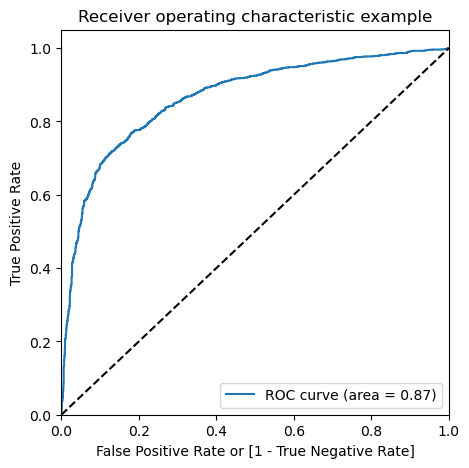

In [149]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


draw_roc(Y_train_resampled_us_pred_final.Churned, Y_train_resampled_us_pred_final.Prob_of_Churn)

In [150]:
list9=X_train_resampled_us_rfe8.columns

In [151]:
list9

Index(['roam_ic_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'last_day_rch_amt_8',
       'count_rech_2g_8', 'fb_user_8', 'aon_years'],
      dtype='object')

In [152]:
X_test1=X_test[list9]

In [153]:
X_test_12=sm.add_constant(X_test1)

In [154]:
Y_test_pred1=model5.predict(X_test_12)
Y_test_pred1[:10]

45591    0.003574
88300    0.098885
51434    0.363354
81837    0.787243
82750    0.032749
42338    0.165054
69253    0.647387
36237    0.266522
22116    0.667309
26540    0.358274
dtype: float64

In [155]:
Y_test_resampled_us_pred_final = pd.DataFrame({"Churned": Y_test.values, "Prob_of_Churn": Y_test_pred1})
Y_test_resampled_us_pred_final.head()

Churned  Prob_of_Churn
45591        0       0.003574
88300        0       0.098885
51434        0       0.363354
81837        0       0.787243
82750        0       0.032749

In [156]:
Y_test_resampled_us_pred_final['Predicted'] = Y_test_resampled_us_pred_final.Prob_of_Churn.map(lambda x: 1 if x > 0.5 else 0)
Y_test_resampled_us_pred_final.head()

Churned  Prob_of_Churn  Predicted
45591        0       0.003574          0
88300        0       0.098885          0
51434        0       0.363354          0
81837        0       0.787243          1
82750        0       0.032749          0

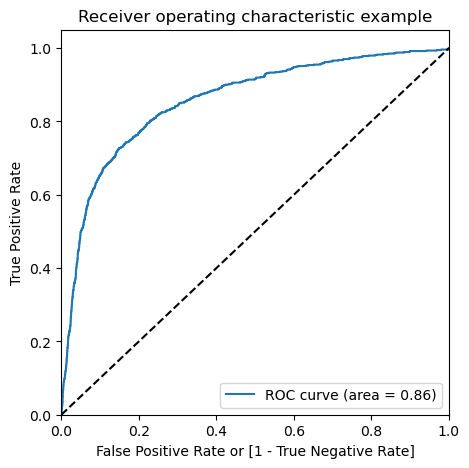

In [157]:
draw_roc(Y_test_resampled_us_pred_final.Churned, Y_test_resampled_us_pred_final.Prob_of_Churn)

In [158]:
print(classification_report(Y_test,Y_test_resampled_us_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      8269
           1       0.23      0.80      0.36       732

    accuracy                           0.77      9001
   macro avg       0.61      0.79      0.61      9001
weighted avg       0.92      0.77      0.82      9001



In [159]:
print ('Accuracy: ', accuracy_score(Y_test,Y_test_resampled_us_pred_final.Predicted))
print ('F1 score: ', f1_score(Y_test,Y_test_resampled_us_pred_final.Predicted))
print ('Recall: ', recall_score(Y_test,Y_test_resampled_us_pred_final.Predicted))
print ('Precision: ', precision_score(Y_test,Y_test_resampled_us_pred_final.Predicted))
print ('\n clasification report:\n', classification_report(Y_test,Y_test_resampled_us_pred_final.Predicted))
print ('\n confussion matrix:\n',confusion_matrix(Y_test,Y_test_resampled_us_pred_final.Predicted))

Accuracy:  0.7702477502499723
F1 score:  0.36251541307028357
Recall:  0.8032786885245902
Precision:  0.2340764331210191

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      8269
           1       0.23      0.80      0.36       732

    accuracy                           0.77      9001
   macro avg       0.61      0.79      0.61      9001
weighted avg       0.92      0.77      0.82      9001


 confussion matrix:
 [[6345 1924]
 [ 144  588]]


In [160]:
print ('Accuracy: ', accuracy_score(Y_train_resampled_us,Y_train_resampled_us_pred_final.Predicted))
print ('F1 score: ', f1_score(Y_train_resampled_us,Y_train_resampled_us_pred_final.Predicted))
print ('Recall: ', recall_score(Y_train_resampled_us,Y_train_resampled_us_pred_final.Predicted))
print ('Precision: ', precision_score(Y_train_resampled_us,Y_train_resampled_us_pred_final.Predicted))
print ('\n clasification report:\n', classification_report(Y_train_resampled_us,Y_train_resampled_us_pred_final.Predicted))
print ('\n confussion matrix:\n',confusion_matrix(Y_train_resampled_us,Y_train_resampled_us_pred_final.Predicted))

Accuracy:  0.7849619660620246
F1 score:  0.7859015438392077
Recall:  0.7893504973668812
Precision:  0.7824825986078886

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1709
           1       0.78      0.79      0.79      1709

    accuracy                           0.78      3418
   macro avg       0.78      0.78      0.78      3418
weighted avg       0.78      0.78      0.78      3418


 confussion matrix:
 [[1334  375]
 [ 360 1349]]


In [161]:
print(classification_report(Y_test,Y_test_resampled_us_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      8269
           1       0.23      0.80      0.36       732

    accuracy                           0.77      9001
   macro avg       0.61      0.79      0.61      9001
weighted avg       0.92      0.77      0.82      9001



In [162]:
from imblearn.under_sampling import RandomUnderSampler
under_sample1 = RandomUnderSampler(random_state = 5)
X_train_resampled_us1, Y_train_resampled_us1 = under_sample1.fit_resample(X_train, Y_train)
len(X_train_resampled_us1)

3418

## Decision Tree

Assessing Non Linear Models such as Decision Tree and Random Forest

In [163]:
from sklearn.model_selection import RandomizedSearchCV

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
hyper_params1 = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50)
                }

In [166]:
dtc=DecisionTreeClassifier(random_state=100)

In [167]:
# Using Randomized Search CV for computational efficiency
dtc_model_rcv = RandomizedSearchCV(estimator=dtc, 
                              param_distributions=hyper_params1,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [168]:
dtc_model_rcv.fit(X_train_resampled_us1, Y_train_resampled_us1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50)},
                   return_train_score=True, verbose=1)

In [169]:
dtc_model_rcvbest=dtc_model_rcv.best_estimator_
dtc_model_rcvbest

DecisionTreeClassifier(max_depth=16, max_features=16, min_samples_leaf=20,
                       random_state=100)

In [170]:
Y_test_pred_resample_us66 = dtc_model_rcvbest.predict(X_test)

In [171]:
Y_train_pred_resample_us66 = dtc_model_rcvbest.predict(X_train_resampled_us1)

In [172]:
cross_val_score(dtc_model_rcvbest, X_train_resampled_us1, Y_train_resampled_us1, cv=5, n_jobs=-1, scoring="recall")

array([0.79239766, 0.81578947, 0.74561404, 0.771261  , 0.80409357])

In [173]:
cross_val_score(dtc_model_rcvbest, X_train_resampled_us1, Y_train_resampled_us1, cv=5, n_jobs=-1, scoring="recall").mean()

0.7858311467819107

In [174]:
cross_val_score(dtc_model_rcvbest, X_train_resampled_us1, Y_train_resampled_us1, cv=5, n_jobs=-1, scoring="precision")

array([0.83128834, 0.79487179, 0.87628866, 0.84294872, 0.81602374])

In [175]:
cross_val_score(dtc_model_rcvbest, X_train_resampled_us1, Y_train_resampled_us1, cv=5, n_jobs=-1, scoring="precision").mean()

0.8322842510090027

In [176]:
cross_val_score(dtc_model_rcvbest, X_train_resampled_us1, Y_train_resampled_us1, cv=5, n_jobs=-1, scoring="accuracy")

array([0.81578947, 0.80263158, 0.82017544, 0.81405564, 0.81112738])

In [177]:
cross_val_score(dtc_model_rcvbest, X_train_resampled_us1, Y_train_resampled_us1, cv=5, n_jobs=-1, scoring="accuracy").mean()

0.8127559014666975

In [178]:
cross_val_score(dtc_model_rcvbest, X_train_resampled_us1, Y_train_resampled_us1, cv=5, n_jobs=-1, scoring="roc_auc").mean()

0.8784996907587977

In [179]:
cross_val_score(dtc_model_rcvbest, X_train_resampled_us1, Y_train_resampled_us1, cv=5, n_jobs=-1, scoring="roc_auc")

array([0.88242109, 0.87563695, 0.87657741, 0.87086485, 0.88699817])

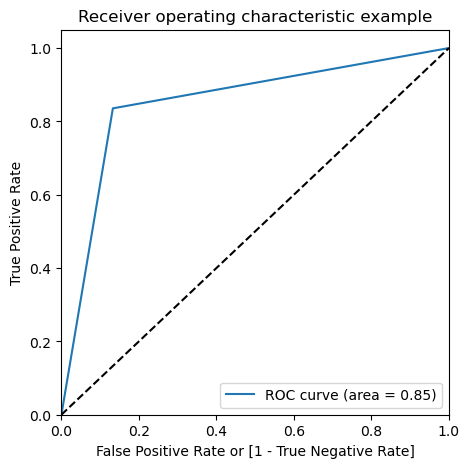

In [180]:
draw_roc(Y_train_resampled_us1,Y_train_pred_resample_us66)

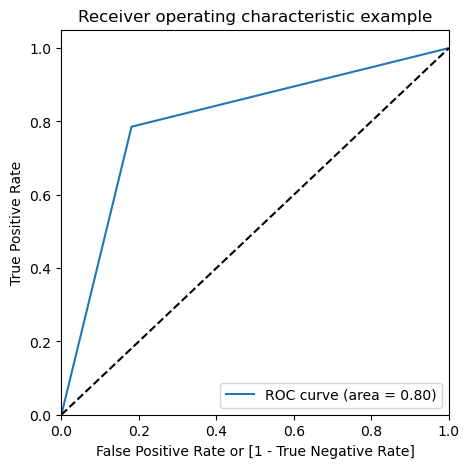

In [181]:
draw_roc(Y_test,Y_test_pred_resample_us66)

In [182]:
print ('Accuracy: ', accuracy_score(Y_test,Y_test_pred_resample_us66))
print ('F1 score: ', f1_score(Y_test,Y_test_pred_resample_us66))
print ('Recall: ', recall_score(Y_test,Y_test_pred_resample_us66))
print ('Precision: ', precision_score(Y_test,Y_test_pred_resample_us66))
print ('\n clasification report:\n', classification_report(Y_test,Y_test_pred_resample_us66))
print ('\n confussion matrix:\n',confusion_matrix(Y_test,Y_test_pred_resample_us66))

Accuracy:  0.8162426397066993
F1 score:  0.4101283880171184
Recall:  0.7855191256830601
Precision:  0.2775096525096525

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      8269
           1       0.28      0.79      0.41       732

    accuracy                           0.82      9001
   macro avg       0.63      0.80      0.65      9001
weighted avg       0.92      0.82      0.85      9001


 confussion matrix:
 [[6772 1497]
 [ 157  575]]


In [183]:
print ('Accuracy: ', accuracy_score(Y_train_resampled_us1,Y_train_pred_resample_us66))
print ('F1 score: ', f1_score(Y_train_resampled_us1,Y_train_pred_resample_us66))
print ('Recall: ', recall_score(Y_train_resampled_us1,Y_train_pred_resample_us66))
print ('Precision: ', precision_score(Y_train_resampled_us1,Y_train_pred_resample_us66))
print ('\n clasification report:\n', classification_report(Y_train_resampled_us1,Y_train_pred_resample_us66))
print ('\n confussion matrix:\n',confusion_matrix(Y_train_resampled_us1,Y_train_pred_resample_us66))

Accuracy:  0.8513750731421884
F1 score:  0.8489892984542212
Recall:  0.8355763604447045
Precision:  0.8628398791540786

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1709
           1       0.86      0.84      0.85      1709

    accuracy                           0.85      3418
   macro avg       0.85      0.85      0.85      3418
weighted avg       0.85      0.85      0.85      3418


 confussion matrix:
 [[1482  227]
 [ 281 1428]]


In [184]:
VariableImportance = pd.DataFrame({
    "Varname":X_train_resampled_us1.columns,
    "ImpVariable": dtc_model_rcvbest.feature_importances_
})
VariableImportance

Varname  ImpVariable
0                             arpu_6     0.000726
1                             arpu_7     0.000525
2                             arpu_8     0.006086
3                        onnet_mou_6     0.000000
4                        onnet_mou_7     0.000000
5                        onnet_mou_8     0.001919
6                       offnet_mou_6     0.000806
7                       offnet_mou_7     0.000000
8                       offnet_mou_8     0.003304
9                      roam_ic_mou_6     0.000000
10                     roam_ic_mou_7     0.000570
11                     roam_ic_mou_8     0.023012
12                     roam_og_mou_6     0.000000
13                     roam_og_mou_7     0.009173
14                     roam_og_mou_8     0.057736
15                  loc_og_t2t_mou_6     0.000816
16                  loc_og_t2t_mou_7     0.001505
17                  loc_og_t2t_mou_8     0.005267
18                  loc_og_t2m_mou_6     0.004079
19                  loc_og_t2m_mou_7     0.000278
20                  loc_og_t2m_mou_8     0.025815
21                  loc_og_t2f_mou_6     0.000000
22                  loc_og_t2f_mou_7     0.000000
23                  loc_og_t2f_mou_8     0.000000
24                  loc_og_t2c_mou_6     0.000000
25                  loc_og_t2c_mou_7     0.000000
26                  loc_og_t2c_mou_8     0.000000
27                      loc_og_mou_6     0.011264
28                      loc_og_mou_7     0.001916
29                      loc_og_mou_8     0.007831
30                  std_og_t2t_mou_6     0.005548
31                  std_og_t2t_mou_7     0.029464
32                  std_og_t2t_mou_8     0.000000
33                  std_og_t2m_mou_6     0.000279
34                  std_og_t2m_mou_7     0.002317
35                  std_og_t2m_mou_8     0.000000
36                  std_og_t2f_mou_6     0.000000
37                  std_og_t2f_mou_7     0.000000
38                  std_og_t2f_mou_8     0.000346
39                      std_og_mou_6     0.000000
40                      std_og_mou_7     0.005412
41                      std_og_mou_8     0.000578
42                      isd_og_mou_6     0.000000
43                      isd_og_mou_7     0.000000
44                      isd_og_mou_8     0.000000
45                      spl_og_mou_6     0.000008
46                      spl_og_mou_7     0.000000
47                      spl_og_mou_8     0.000000
48                       og_others_6     0.000000
49                       og_others_7     0.000000
50                       og_others_8     0.000000
51                    total_og_mou_6     0.015437
52                    total_og_mou_7     0.001542
53                    total_og_mou_8     0.021696
54                  loc_ic_t2t_mou_6     0.003499
55                  loc_ic_t2t_mou_7     0.000000
56                  loc_ic_t2t_mou_8     0.000000
57                  loc_ic_t2m_mou_6     0.013067
58                  loc_ic_t2m_mou_7     0.000000
59                  loc_ic_t2m_mou_8     0.005671
60                  loc_ic_t2f_mou_6     0.000000
61                  loc_ic_t2f_mou_7     0.000000
62                  loc_ic_t2f_mou_8     0.022325
63                      loc_ic_mou_6     0.009933
64                      loc_ic_mou_7     0.000000
65                      loc_ic_mou_8     0.173964
66                  std_ic_t2t_mou_6     0.000000
67                  std_ic_t2t_mou_7     0.000706
68                  std_ic_t2t_mou_8     0.000000
69                  std_ic_t2m_mou_6     0.000000
70                  std_ic_t2m_mou_7     0.001359
71                  std_ic_t2m_mou_8     0.000000
72                  std_ic_t2f_mou_6     0.000000
73                  std_ic_t2f_mou_7     0.000000
74                  std_ic_t2f_mou_8     0.013425
75                      std_ic_mou_6     0.000000
76                      std_ic_mou_7     0.000000
77                      std_ic_mou_8     0.003304
78                    total_ic_mou_6     0.000512
79                    total_i

In [185]:
VariableImportance.sort_values(by="ImpVariable", ascending=False)

Varname  ImpVariable
98                    max_rech_amt_8     0.387924
65                      loc_ic_mou_8     0.173964
14                     roam_og_mou_8     0.057736
31                  std_og_t2t_mou_7     0.029464
20                  loc_og_t2m_mou_8     0.025815
11                     roam_ic_mou_8     0.023012
122                      vol_3g_mb_8     0.022327
62                  loc_ic_t2f_mou_8     0.022325
53                    total_og_mou_8     0.021696
116               av_rech_amt_data_8     0.021542
146                        fb_user_8     0.017983
51                    total_og_mou_6     0.015437
74                  std_ic_t2f_mou_8     0.013425
57                  loc_ic_t2m_mou_6     0.013067
27                      loc_og_mou_6     0.011264
63                      loc_ic_mou_6     0.009933
13                     roam_og_mou_7     0.009173
29                      loc_og_mou_8     0.007831
119                      vol_2g_mb_8     0.007428
94                  total_rech_amt_7     0.006373
2                             arpu_8     0.006086
121                      vol_3g_mb_7     0.005954
59                  loc_ic_t2m_mou_8     0.005671
30                  std_og_t2t_mou_6     0.005548
40                      std_og_mou_7     0.005412
17                  loc_og_t2t_mou_8     0.005267
96                    max_rech_amt_6     0.004909
18                  loc_og_t2m_mou_6     0.004079
54                  loc_ic_t2t_mou_6     0.003499
77                      std_ic_mou_8     0.003304
8                       offnet_mou_8     0.003304
151            total_rech_amt_data_7     0.003125
85                      isd_ic_mou_7     0.002981
79                    total_ic_mou_7     0.002976
101               last_day_rch_amt_8     0.002836
80                    total_ic_mou_8     0.002806
124                        arpu_3g_7     0.002694
34                  std_og_t2m_mou_7     0.002317
154                        aon_years     0.002285
84                      isd_ic_mou_6     0.002195
93                  total_rech_amt_6     0.002085
5                        onnet_mou_8     0.001919
28                      loc_og_mou_7     0.001916
90                  total_rech_num_6     0.001882
123                        arpu_3g_6     0.001571
52                    total_og_mou_7     0.001542
16                  loc_og_t2t_mou_7     0.001505
153    avg_rech_amt_combined_6 and 7     0.001459
70                  std_ic_t2m_mou_7     0.001359
135                      sachet_2g_6     0.001082
15                  loc_og_t2t_mou_6     0.000816
6                       offnet_mou_6     0.000806
0                             arpu_6     0.000726
67                  std_ic_t2t_mou_7     0.000706
143                      sachet_3g_8     0.000660
140                     monthly_3g_8     0.000642
41                      std_og_mou_8     0.000578
10                     roam_ic_mou_7     0.000570
1                             arpu_7     0.000525
78                    total_ic_mou_6     0.000512
115               av_rech_amt_data_7     0.000453
99                last_day_rch_amt_6     0.000355
38                  std_og_t2f_mou_8     0.000346
33                  std_og_t2m_mou_6     0.000279
19                  loc_og_t2m_mou_7     0.000278
91                  total_rech_num_7     0.000203
114               av_rech_amt_data_6     0.000180
109                  count_rech_2g_7     0.000072
45                      spl_og_mou_6     0.000008
110                  count_rech_2g_8     0.000000
117                      vol_2g_mb_6     0.000000
111                  count_rech_3g_6     0.000000
9                      roam_ic_mou_6     0.000000
120                      vol_3g_mb_6     0.000000
7                       offnet_mou_7     0.000000
108                  count_rech_2g_6     0.000000
112                  count_rech_3g_7     0.000000
113                  count_rech_3g_8     0.000000
118                      vol_2g_mb_7     0.000000
129                 night_pck

## Random forest

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
hyper_params2 = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 200, 10)}

In [188]:
rfc = RandomForestClassifier(random_state=100,oob_score=True)

In [189]:
rcvmodelrf = RandomizedSearchCV(estimator=rfc,param_distributions=hyper_params2,verbose=1,cv=5,return_train_score=True,n_jobs=-1,n_iter=50)

In [190]:
rcvmodelrf.fit(X_train_resampled_us1, Y_train_resampled_us1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=100),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 200, 10)},
                   return_train_score=True, verbose=1)

In [191]:
rcvmodelrf_best=rcvmodelrf.best_estimator_

In [192]:
Y_test_resample_us_rf = rcvmodelrf_best.predict(X_test)

In [193]:
Y_train_resample_us_rf = rcvmodelrf_best.predict(X_train_resampled_us1)

In [194]:
print ('Accuracy: ', accuracy_score(Y_train_resampled_us1,Y_train_resample_us_rf))
print ('F1 score: ', f1_score(Y_train_resampled_us1,Y_train_resample_us_rf))
print ('Recall: ', recall_score(Y_train_resampled_us1,Y_train_resample_us_rf))
print ('Precision: ', precision_score(Y_train_resampled_us1,Y_train_resample_us_rf))
print ('\n clasification report:\n', classification_report(Y_train_resampled_us1,Y_train_resample_us_rf))
print ('\n confussion matrix:\n',confusion_matrix(Y_train_resampled_us1,Y_train_resample_us_rf))

Accuracy:  0.8777062609713283
F1 score:  0.8730255164034021
Recall:  0.8408425980105325
Precision:  0.9077700568540745

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1709
           1       0.91      0.84      0.87      1709

    accuracy                           0.88      3418
   macro avg       0.88      0.88      0.88      3418
weighted avg       0.88      0.88      0.88      3418


 confussion matrix:
 [[1563  146]
 [ 272 1437]]


In [195]:
print ('Accuracy: ', accuracy_score(Y_test, Y_test_resample_us_rf))
print ('F1 score: ', f1_score(Y_test, Y_test_resample_us_rf))
print ('Recall: ', recall_score(Y_test, Y_test_resample_us_rf))
print ('Precision: ', precision_score(Y_test, Y_test_resample_us_rf))
print ('\n clasification report:\n', classification_report(Y_test, Y_test_resample_us_rf))
print ('\n confussion matrix:\n',confusion_matrix(Y_test, Y_test_resample_us_rf))

Accuracy:  0.882679702255305
F1 score:  0.5294117647058824
Recall:  0.8114754098360656
Precision:  0.39285714285714285

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      8269
           1       0.39      0.81      0.53       732

    accuracy                           0.88      9001
   macro avg       0.69      0.85      0.73      9001
weighted avg       0.93      0.88      0.90      9001


 confussion matrix:
 [[7351  918]
 [ 138  594]]


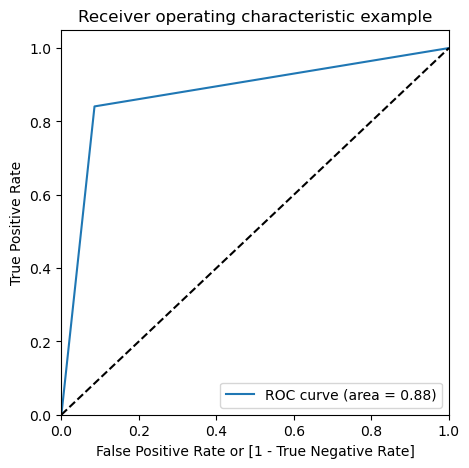

In [196]:
draw_roc(Y_train_resampled_us1,Y_train_resample_us_rf)

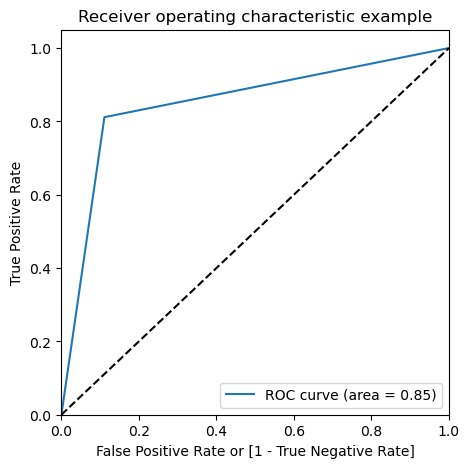

In [197]:
draw_roc(Y_test, Y_test_resample_us_rf)

In [198]:
rcvmodelrf_best.oob_score_

0.8464014043300175

In [199]:
# Important variables according to Random Forest 
VariableImportance1 = pd.DataFrame({
    "Varname":X_train_resampled_us1.columns,
    "ImpVariable": rcvmodelrf_best.feature_importances_
})
VariableImportance1

Varname  ImpVariable
0                             arpu_6     0.002551
1                             arpu_7     0.003822
2                             arpu_8     0.040984
3                        onnet_mou_6     0.002492
4                        onnet_mou_7     0.002245
5                        onnet_mou_8     0.003879
6                       offnet_mou_6     0.002154
7                       offnet_mou_7     0.003587
8                       offnet_mou_8     0.009344
9                      roam_ic_mou_6     0.000377
10                     roam_ic_mou_7     0.003652
11                     roam_ic_mou_8     0.034345
12                     roam_og_mou_6     0.000400
13                     roam_og_mou_7     0.001948
14                     roam_og_mou_8     0.037884
15                  loc_og_t2t_mou_6     0.001153
16                  loc_og_t2t_mou_7     0.001445
17                  loc_og_t2t_mou_8     0.010077
18                  loc_og_t2m_mou_6     0.002587
19                  loc_og_t2m_mou_7     0.002320
20                  loc_og_t2m_mou_8     0.015112
21                  loc_og_t2f_mou_6     0.000339
22                  loc_og_t2f_mou_7     0.000599
23                  loc_og_t2f_mou_8     0.009468
24                  loc_og_t2c_mou_6     0.000075
25                  loc_og_t2c_mou_7     0.000133
26                  loc_og_t2c_mou_8     0.000153
27                      loc_og_mou_6     0.002018
28                      loc_og_mou_7     0.004335
29                      loc_og_mou_8     0.015944
30                  std_og_t2t_mou_6     0.001704
31                  std_og_t2t_mou_7     0.002754
32                  std_og_t2t_mou_8     0.001775
33                  std_og_t2m_mou_6     0.001682
34                  std_og_t2m_mou_7     0.002629
35                  std_og_t2m_mou_8     0.004504
36                  std_og_t2f_mou_6     0.000205
37                  std_og_t2f_mou_7     0.000140
38                  std_og_t2f_mou_8     0.000064
39                      std_og_mou_6     0.003925
40                      std_og_mou_7     0.005163
41                      std_og_mou_8     0.003171
42                      isd_og_mou_6     0.000129
43                      isd_og_mou_7     0.000233
44                      isd_og_mou_8     0.000293
45                      spl_og_mou_6     0.000965
46                      spl_og_mou_7     0.001089
47                      spl_og_mou_8     0.003318
48                       og_others_6     0.000090
49                       og_others_7     0.000000
50                       og_others_8     0.000000
51                    total_og_mou_6     0.002963
52                    total_og_mou_7     0.003630
53                    total_og_mou_8     0.091781
54                  loc_ic_t2t_mou_6     0.001443
55                  loc_ic_t2t_mou_7     0.001747
56                  loc_ic_t2t_mou_8     0.017992
57                  loc_ic_t2m_mou_6     0.002392
58                  loc_ic_t2m_mou_7     0.002485
59                  loc_ic_t2m_mou_8     0.047653
60                  loc_ic_t2f_mou_6     0.000735
61                  loc_ic_t2f_mou_7     0.001258
62                  loc_ic_t2f_mou_8     0.023792
63                      loc_ic_mou_6     0.002348
64                      loc_ic_mou_7     0.002904
65                      loc_ic_mou_8     0.038345
66                  std_ic_t2t_mou_6     0.000728
67                  std_ic_t2t_mou_7     0.001510
68                  std_ic_t2t_mou_8     0.002637
69                  std_ic_t2m_mou_6     0.001296
70                  std_ic_t2m_mou_7     0.001486
71                  std_ic_t2m_mou_8     0.006372
72                  std_ic_t2f_mou_6     0.000015
73                  std_ic_t2f_mou_7     0.000274
74                  std_ic_t2f_mou_8     0.001882
75                      std_ic_mou_6     0.000856
76                      std_ic_mou_7     0.001147
77                      std_ic_mou_8     0.006164
78                    total_ic_mou_6     0.005011
79                    total_i

In [200]:
VariableImportance1.sort_values(by="ImpVariable", ascending=False)

Varname  ImpVariable
80                    total_ic_mou_8     0.096789
53                    total_og_mou_8     0.091781
95                  total_rech_amt_8     0.072139
101               last_day_rch_amt_8     0.069705
59                  loc_ic_t2m_mou_8     0.047653
116               av_rech_amt_data_8     0.045142
2                             arpu_8     0.040984
65                      loc_ic_mou_8     0.038345
14                     roam_og_mou_8     0.037884
98                    max_rech_amt_8     0.035354
11                     roam_ic_mou_8     0.034345
62                  loc_ic_t2f_mou_8     0.023792
119                      vol_2g_mb_8     0.022194
104                total_rech_data_8     0.020368
56                  loc_ic_t2t_mou_8     0.017992
146                        fb_user_8     0.017961
29                      loc_og_mou_8     0.015944
20                  loc_og_t2m_mou_8     0.015112
107                  max_rech_data_8     0.014770
17                  loc_og_t2t_mou_8     0.010077
23                  loc_og_t2f_mou_8     0.009468
8                       offnet_mou_8     0.009344
92                  total_rech_num_8     0.007951
122                      vol_3g_mb_8     0.007289
128                        arpu_2g_8     0.007067
71                  std_ic_t2m_mou_8     0.006372
77                      std_ic_mou_8     0.006164
110                  count_rech_2g_8     0.005640
79                    total_ic_mou_7     0.005466
40                      std_og_mou_7     0.005163
78                    total_ic_mou_6     0.005011
35                  std_og_t2m_mou_8     0.004504
28                      loc_og_mou_7     0.004335
94                  total_rech_amt_7     0.004188
39                      std_og_mou_6     0.003925
5                        onnet_mou_8     0.003879
1                             arpu_7     0.003822
10                     roam_ic_mou_7     0.003652
52                    total_og_mou_7     0.003630
7                       offnet_mou_7     0.003587
93                  total_rech_amt_6     0.003370
47                      spl_og_mou_8     0.003318
41                      std_og_mou_8     0.003171
51                    total_og_mou_6     0.002963
64                      loc_ic_mou_7     0.002904
31                  std_og_t2t_mou_7     0.002754
68                  std_ic_t2t_mou_8     0.002637
34                  std_og_t2m_mou_7     0.002629
18                  loc_og_t2m_mou_6     0.002587
0                             arpu_6     0.002551
147                       aug_vbc_3g     0.002530
3                        onnet_mou_6     0.002492
58                  loc_ic_t2m_mou_7     0.002485
57                  loc_ic_t2m_mou_6     0.002392
63                      loc_ic_mou_6     0.002348
19                  loc_og_t2m_mou_7     0.002320
4                        onnet_mou_7     0.002245
125                        arpu_3g_8     0.002220
6                       offnet_mou_6     0.002154
115               av_rech_amt_data_7     0.002076
153    avg_rech_amt_combined_6 and 7     0.002057
27                      loc_og_mou_6     0.002018
13                     roam_og_mou_7     0.001948
74                  std_ic_t2f_mou_8     0.001882
32                  std_og_t2t_mou_8     0.001775
55                  loc_ic_t2t_mou_7     0.001747
30                  std_og_t2t_mou_6     0.001704
33                  std_og_t2m_mou_6     0.001682
152  total_rech_amt_combined_6 and 7     0.001594
118                      vol_2g_mb_7     0.001570
90                  total_rech_num_6     0.001561
114               av_rech_amt_data_6     0.001550
67                  std_ic_t2t_mou_7     0.001510
70                  std_ic_t2m_mou_7     0.001486
16                  loc_og_t2t_mou_7     0.001445
54                  loc_ic_t2t_mou_6     0.001443
121                      vol_3g_mb_7     0.001396
69                  std_ic_t2m_mou_6     0.001296
123                        arpu_3g_6     0.001292
124                        ar

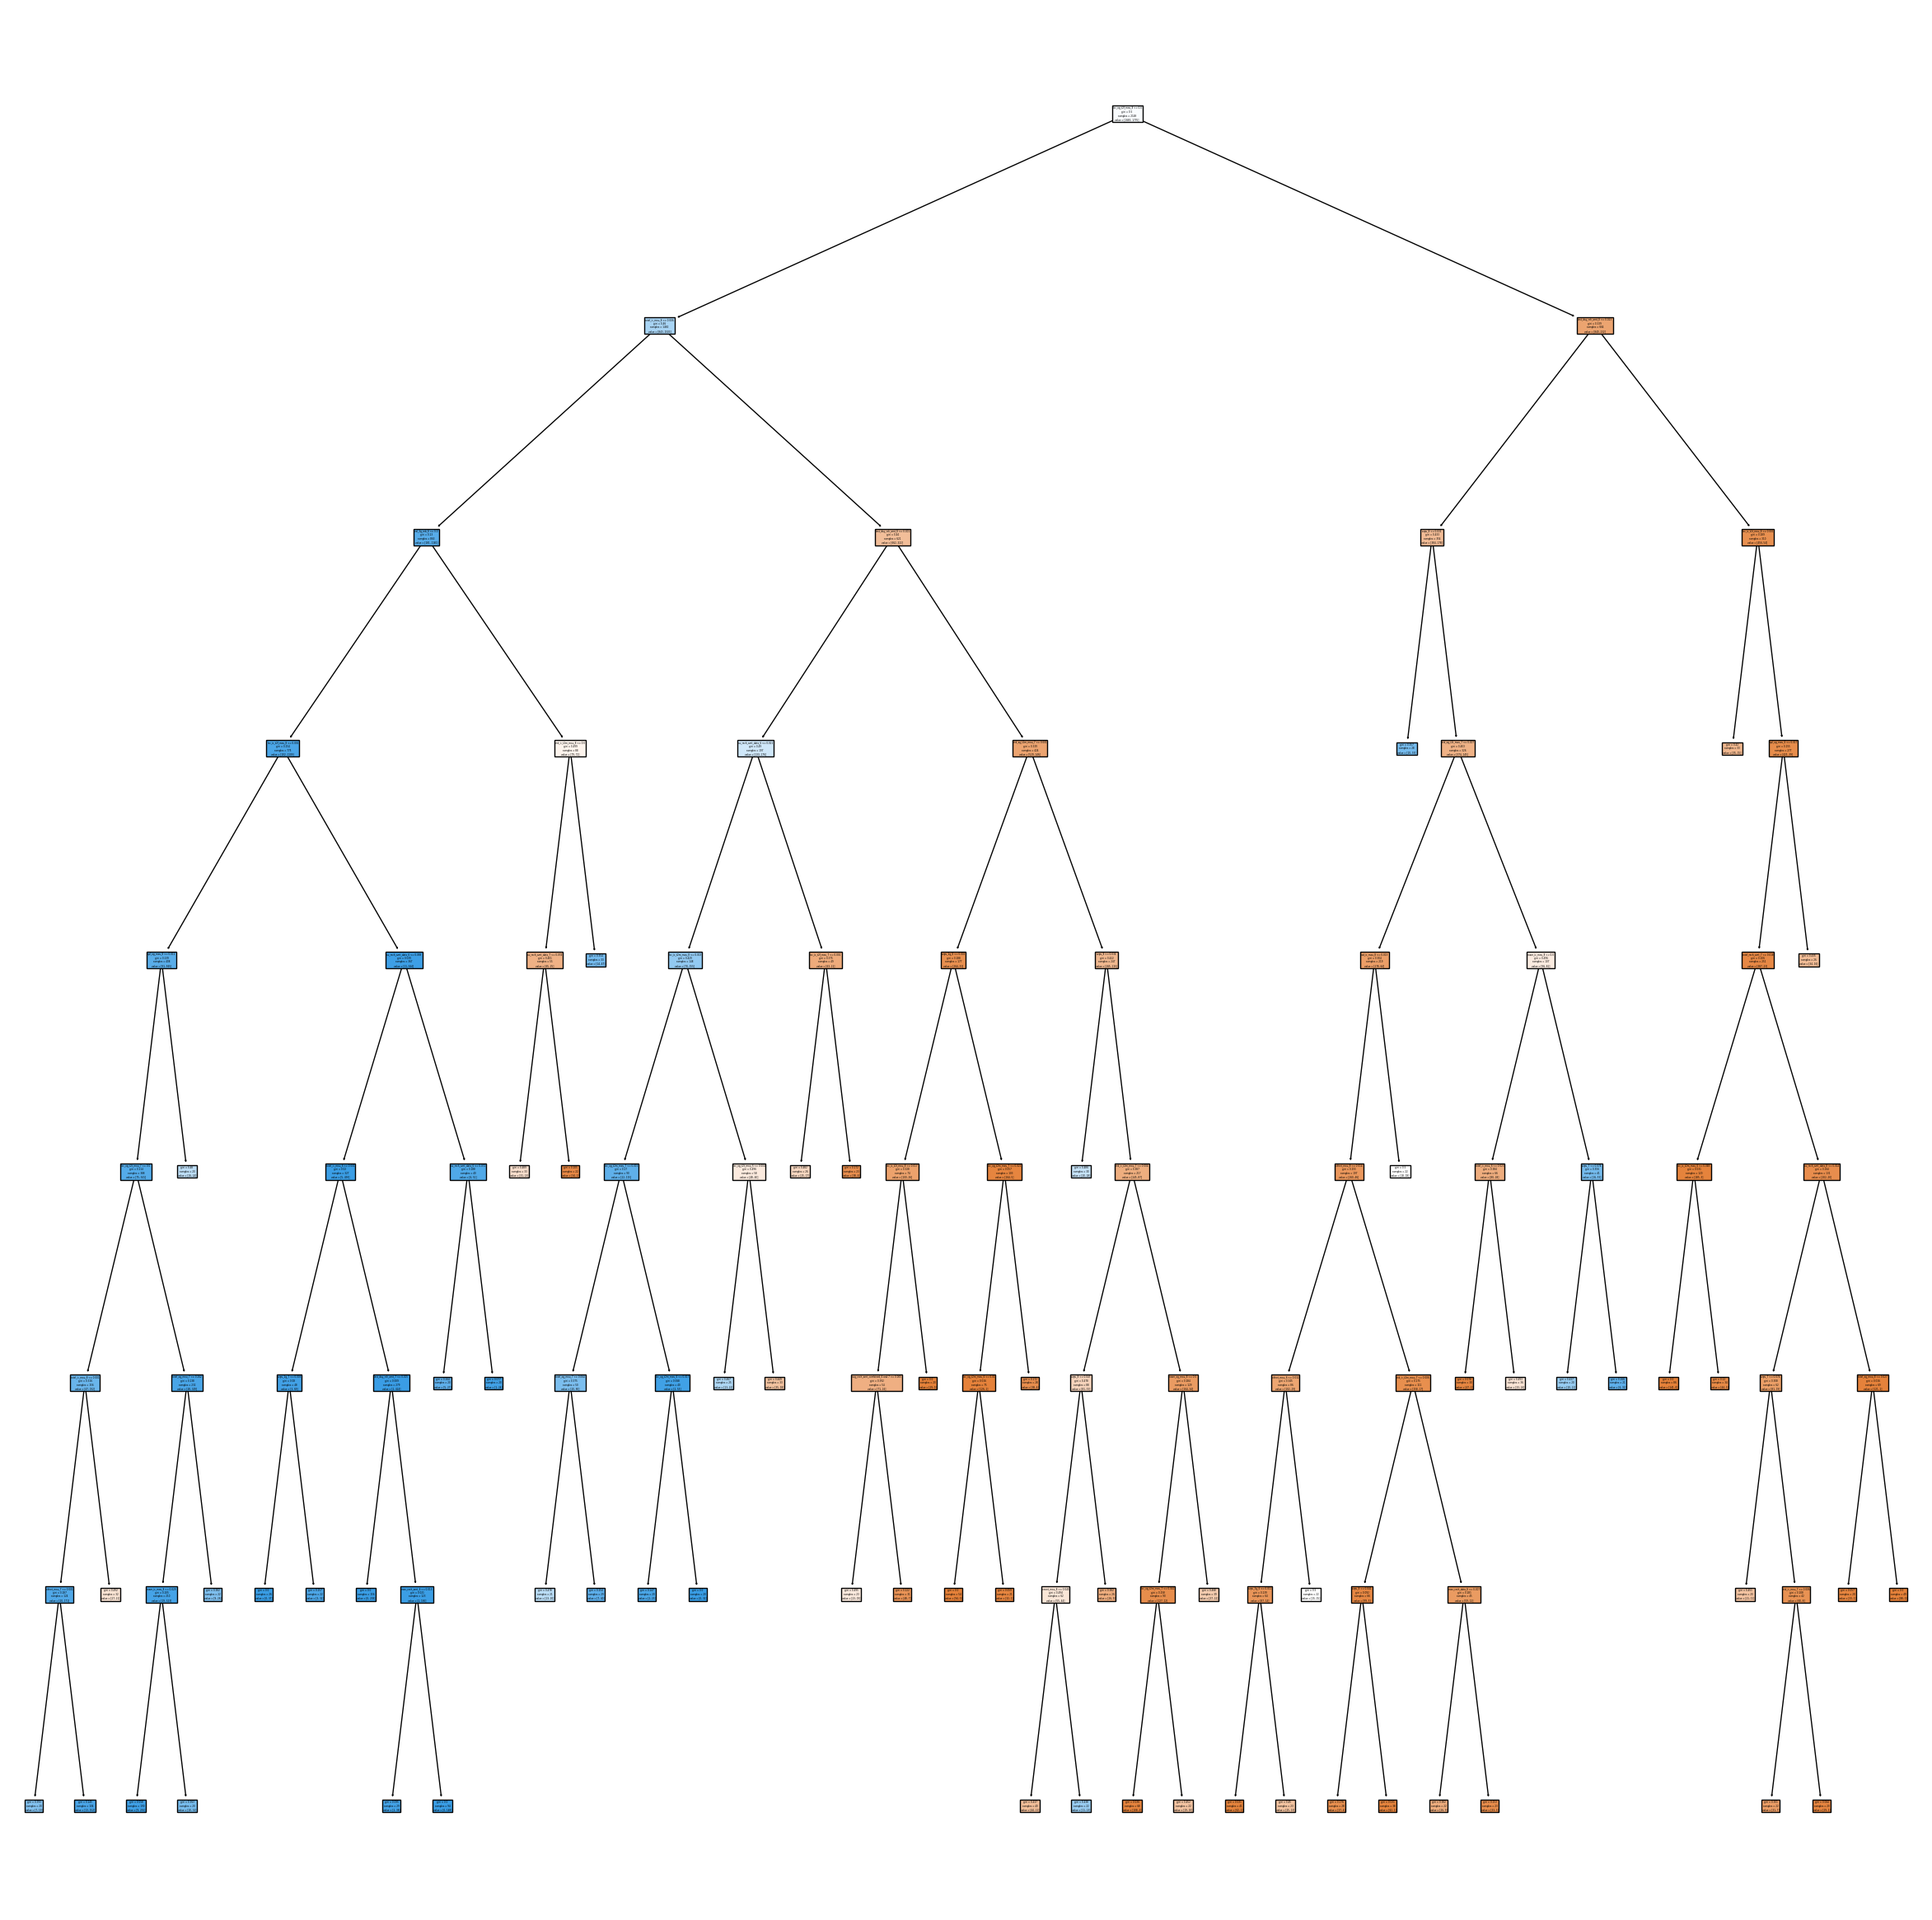

In [202]:
# Random Forest 1st Estimator
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(rcvmodelrf_best.estimators_[0], feature_names=X_train_resampled_us1.columns, filled=True)
plt.show()

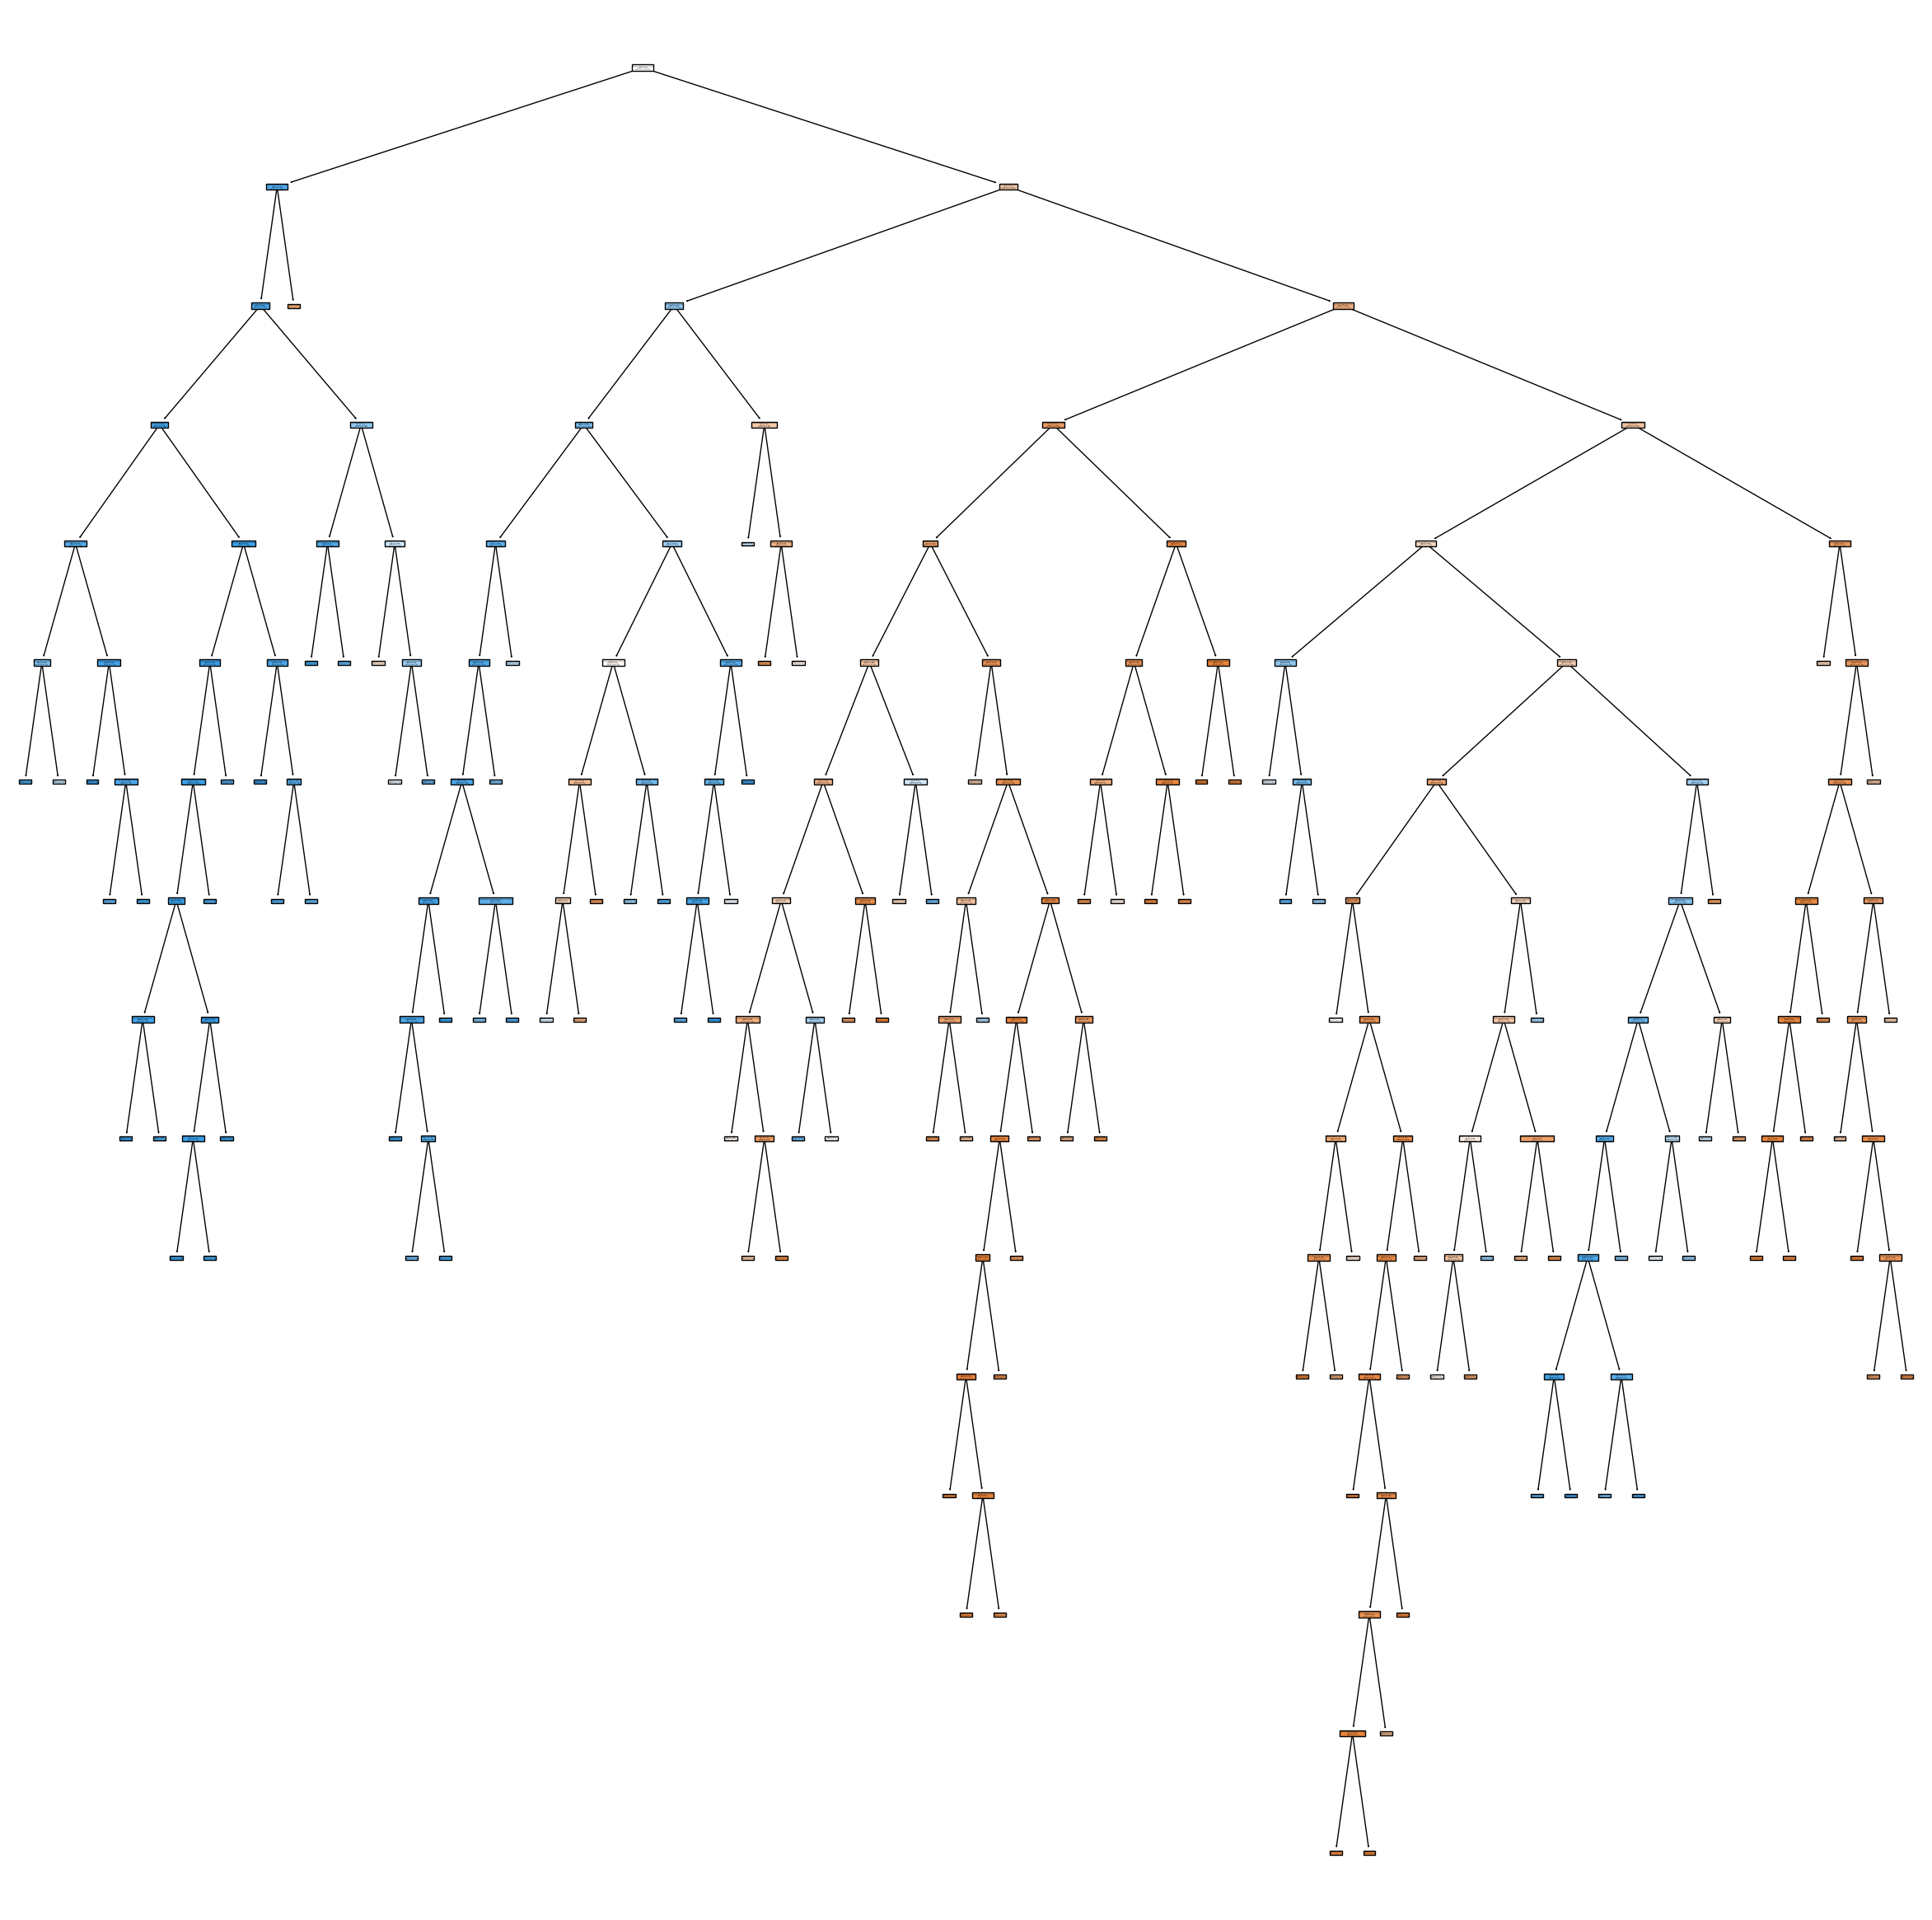

In [203]:
# Decision Tree Classifier Tree Plot
plt.figure(figsize=(30,30))
tree.plot_tree(dtc_model_rcvbest, feature_names=X_train_resampled_us1.columns, filled=True)
plt.show()

# Results

In the context of predicting customer churn in the telecom industry, recall is the most important metric because it represents the ability of the model to correctly identify customers at risk of churning. Prioritizing recall ensures that we minimize the risk of missing out on any churning customers (false negatives), which is crucial given that the cost of losing a customer (lost revenue and the high cost of acquiring a new customer) is significantly higher than the cost of mistakenly trying to retain a customer who isn't at risk of churning (false positives).Hence given that Logistic Regression has a high recall score in comparison to the decision tree classifier and the recall score of random forest vs logistic regression is not very different. We would be interpreting the results based on logistic regression

Equation

churn=1.1975+(16.7762)*roam_ic_mou_7+(-5.8984)*loc_og_t2m_mou_6+(-6.4484)*loc_og_t2f_mou_6+(-3.0960)*loc_ic_mou_6+(-24.6533	)*std_ic_t2t_mou_8+(-7.0222)*spl_ic_mou_8+(9.2164)*total_rech_num_7+(-28.0607)*total_rech_num_8+(30.0569)*total_rech_amt_6+(-19.8325)*last_day_rch_amt_8+(-4.1465)*count_rech_2g_8+(-1.3053)*fb_user_8+(-1.4762)*aon_years

# Recommendations

roam_ic_mou_7: Roaming incoming minutes of usage in the 7th month has a strong positive relationship with churn. This suggests that customers who use more roaming services are more likely to churn. The telecom firm could consider offering better roaming plans or improving roaming service quality to retain these customers.

total_rech_num_8: The total number of recharges in the 8th month has a strong negative relationship with churn. This indicates that customers who recharge less frequently in the 8th month are more likely to churn. To mitigate this, the firm could implement targeted marketing campaigns to encourage customers to recharge more frequently, or offer special deals on recharges in this period.

total_rech_amt_6: The total recharge amount in the 6th month has a positive impact on customer retention. This suggests that customers who recharge more (higher amounts) in the 6th month are less likely to churn. Therefore, promoting higher-value recharge packages could be beneficial.

fb_user_8: Whether the customer is a Facebook user in the 8th month has a negative correlation with churn. This suggests that customers who are not Facebook users in the 8th month are more likely to churn. It could be beneficial to explore partnerships with Facebook or offer special data packages for Facebook usage to improve customer retention.

aon_years: The age of the customer's account (in years) negatively impacts churn, meaning customers with longer relationships with the company are less likely to churn. This emphasizes the importance of building long-term relationships with customers, possibly through loyalty programs or long-term benefits.